# Model Evalution 
Following Dimensionality Reduction and PCA, this script includes the Principal Component Assessment, Hypertuning, Model Assessment and Model Selection.

7 different algorithms will be examined:
- Decision Trees (DT).
- Gradient Boosting Classifier (GBC).
- K-Nearest Neighbors (KNN).
- Logistic Regression (LR).
- Gaussian Naive Bayes (NB).
- Random Forest (RF).
- Support Vector Machines (SVM).

In [81]:
# Load all the necessary modules
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [64]:
# Insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file 
loaded_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(loaded_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=1, stratify=y)

## Principal Component Assessment
Finding the optimum number of principal components for each model. 

Comparisons between scaled and unscaled data provided the confirmation that unscaled data should be used moving forward. 

In [47]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy_DT = np.empty(len(n_components))
test_accuracy_DT = np.empty(len(n_components))
train_accuracy_KNN = np.empty(len(n_components))
test_accuracy_KNN = np.empty(len(n_components))
train_accuracy_GBC = np.empty(len(n_components))
test_accuracy_GBC = np.empty(len(n_components))
train_accuracy_LR = np.empty(len(n_components))
test_accuracy_LR = np.empty(len(n_components))
train_accuracy_NB = np.empty(len(n_components))
test_accuracy_NB = np.empty(len(n_components))
train_accuracy_RF = np.empty(len(n_components))
test_accuracy_RF = np.empty(len(n_components))
train_accuracy_SVM = np.empty(len(n_components))
test_accuracy_SVM = np.empty(len(n_components))

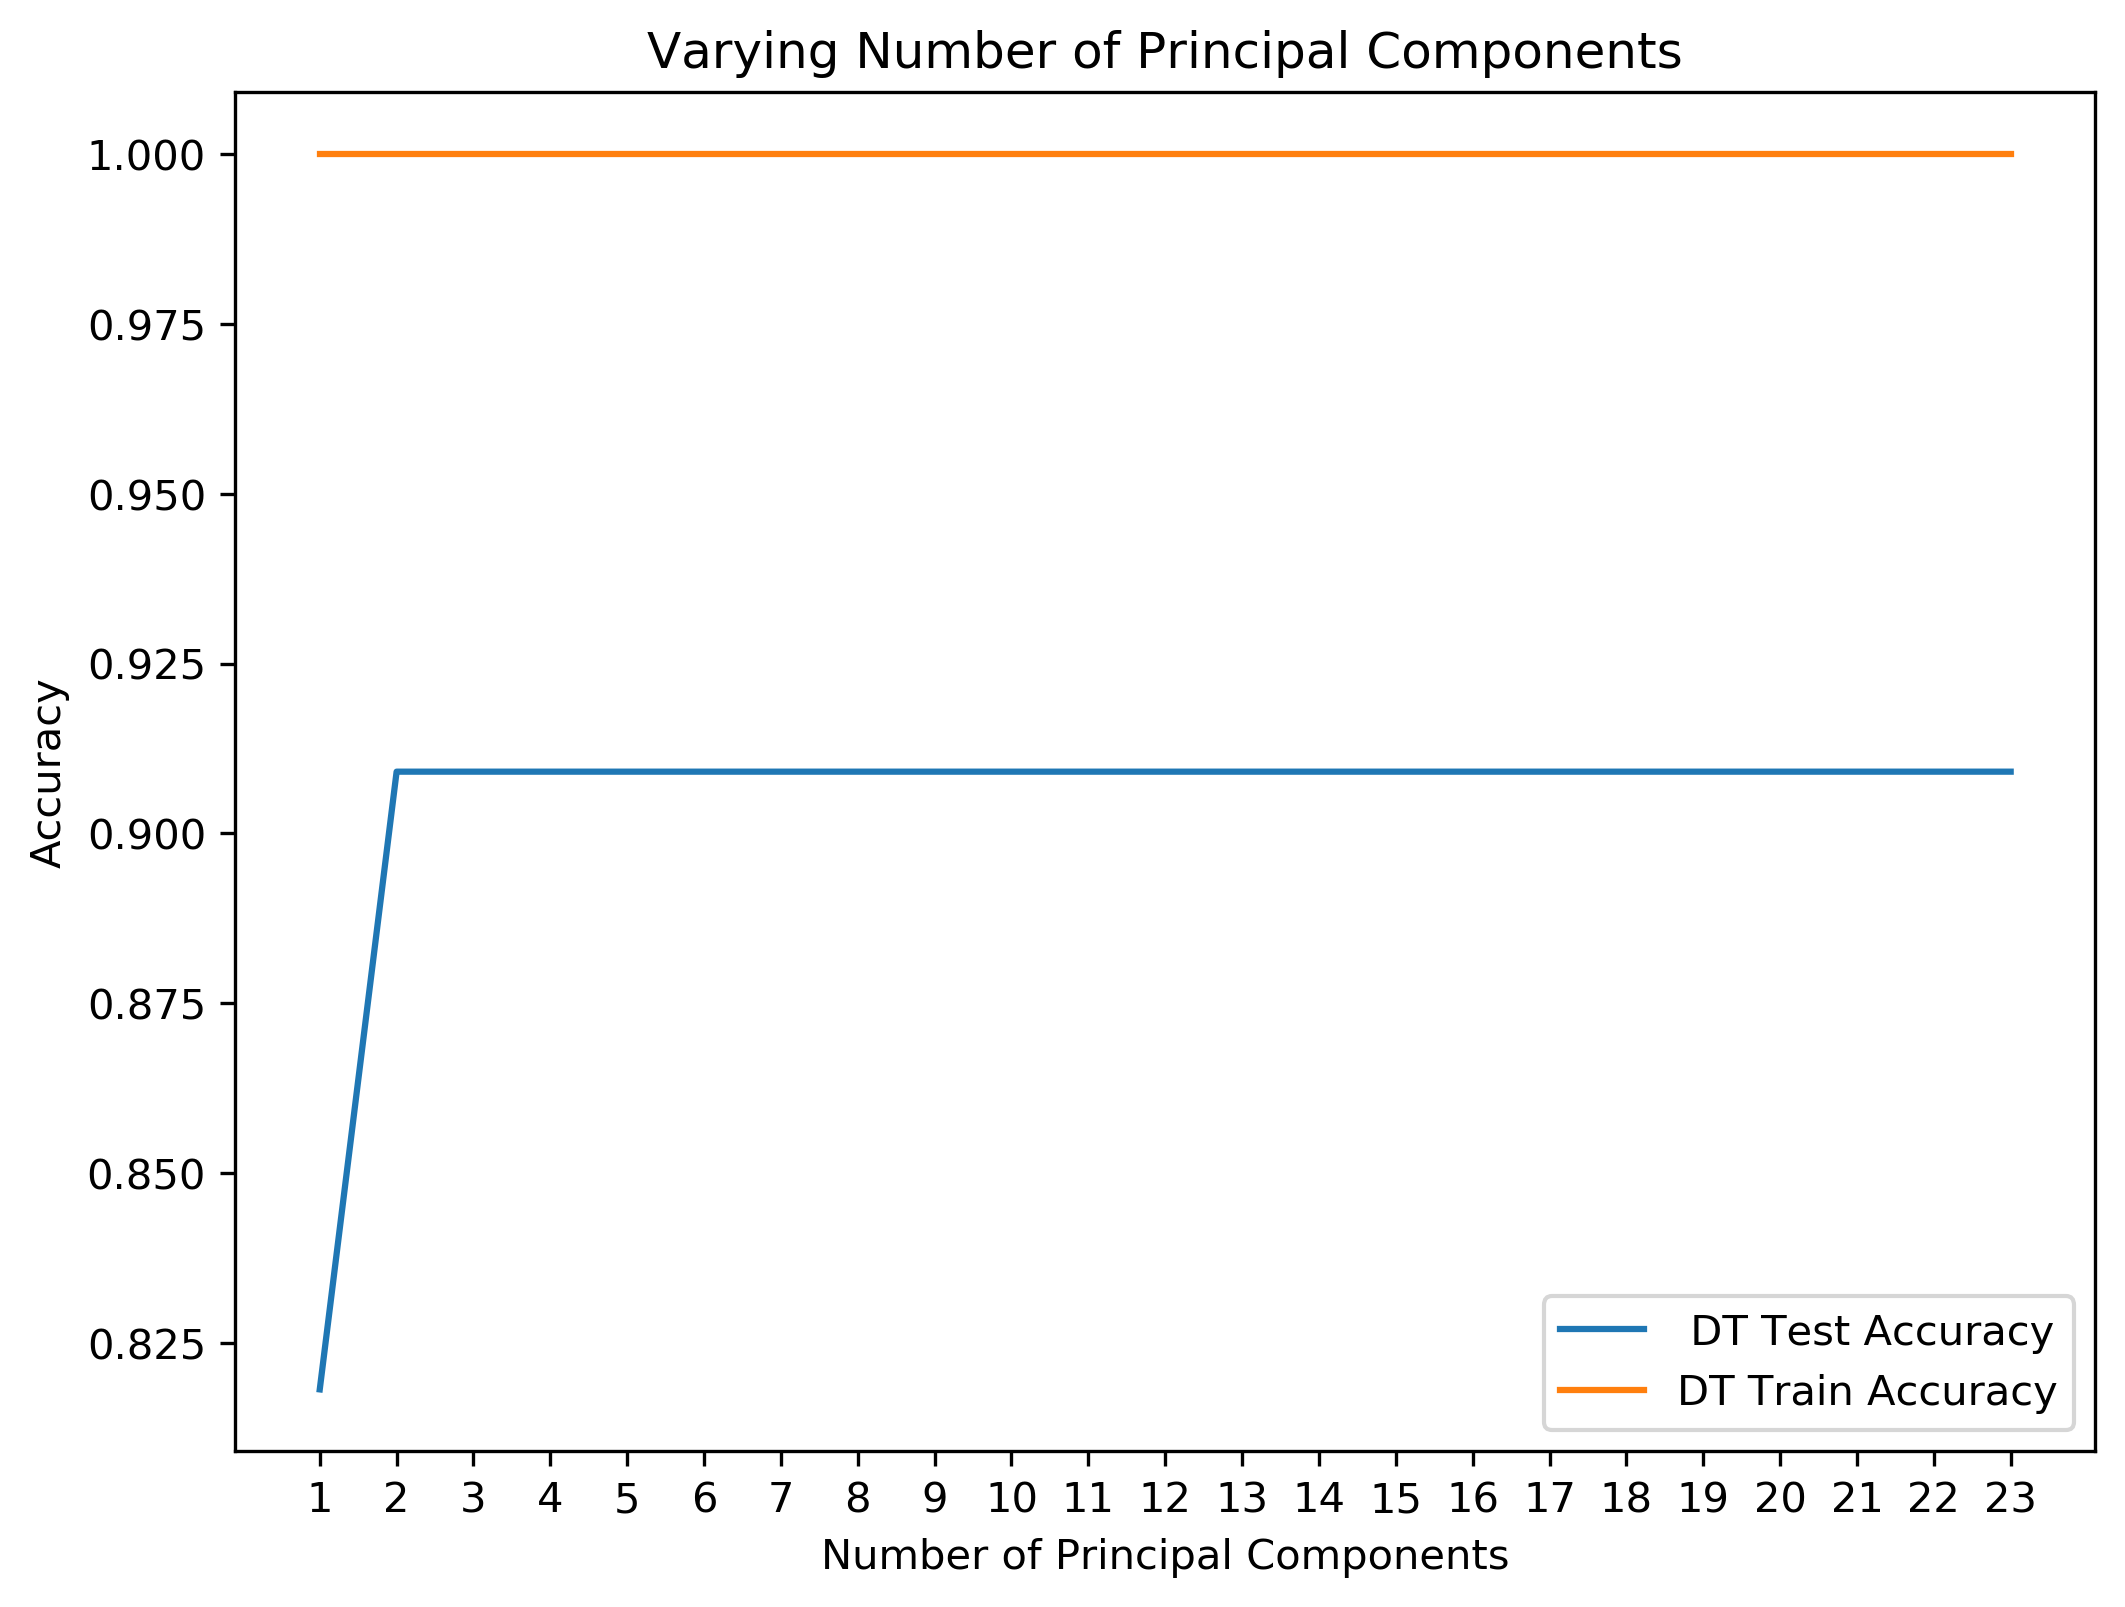

In [48]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a DT Classifier with default hyperparameter settings
    DT_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', DecisionTreeClassifier())])
    
    # Fit DT pipeline to to the training data
    DT_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_DT[i] = DT_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_DT[i] = DT_pipe.score(X_test, y_test)
    
# Generate plot
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principal Components')
plt.plot(n_components, test_accuracy_DT, label = ' DT Test Accuracy')
plt.plot(n_components, train_accuracy_DT, label = 'DT Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

Lowest optimum number of principal components observed is 2 for DT. 

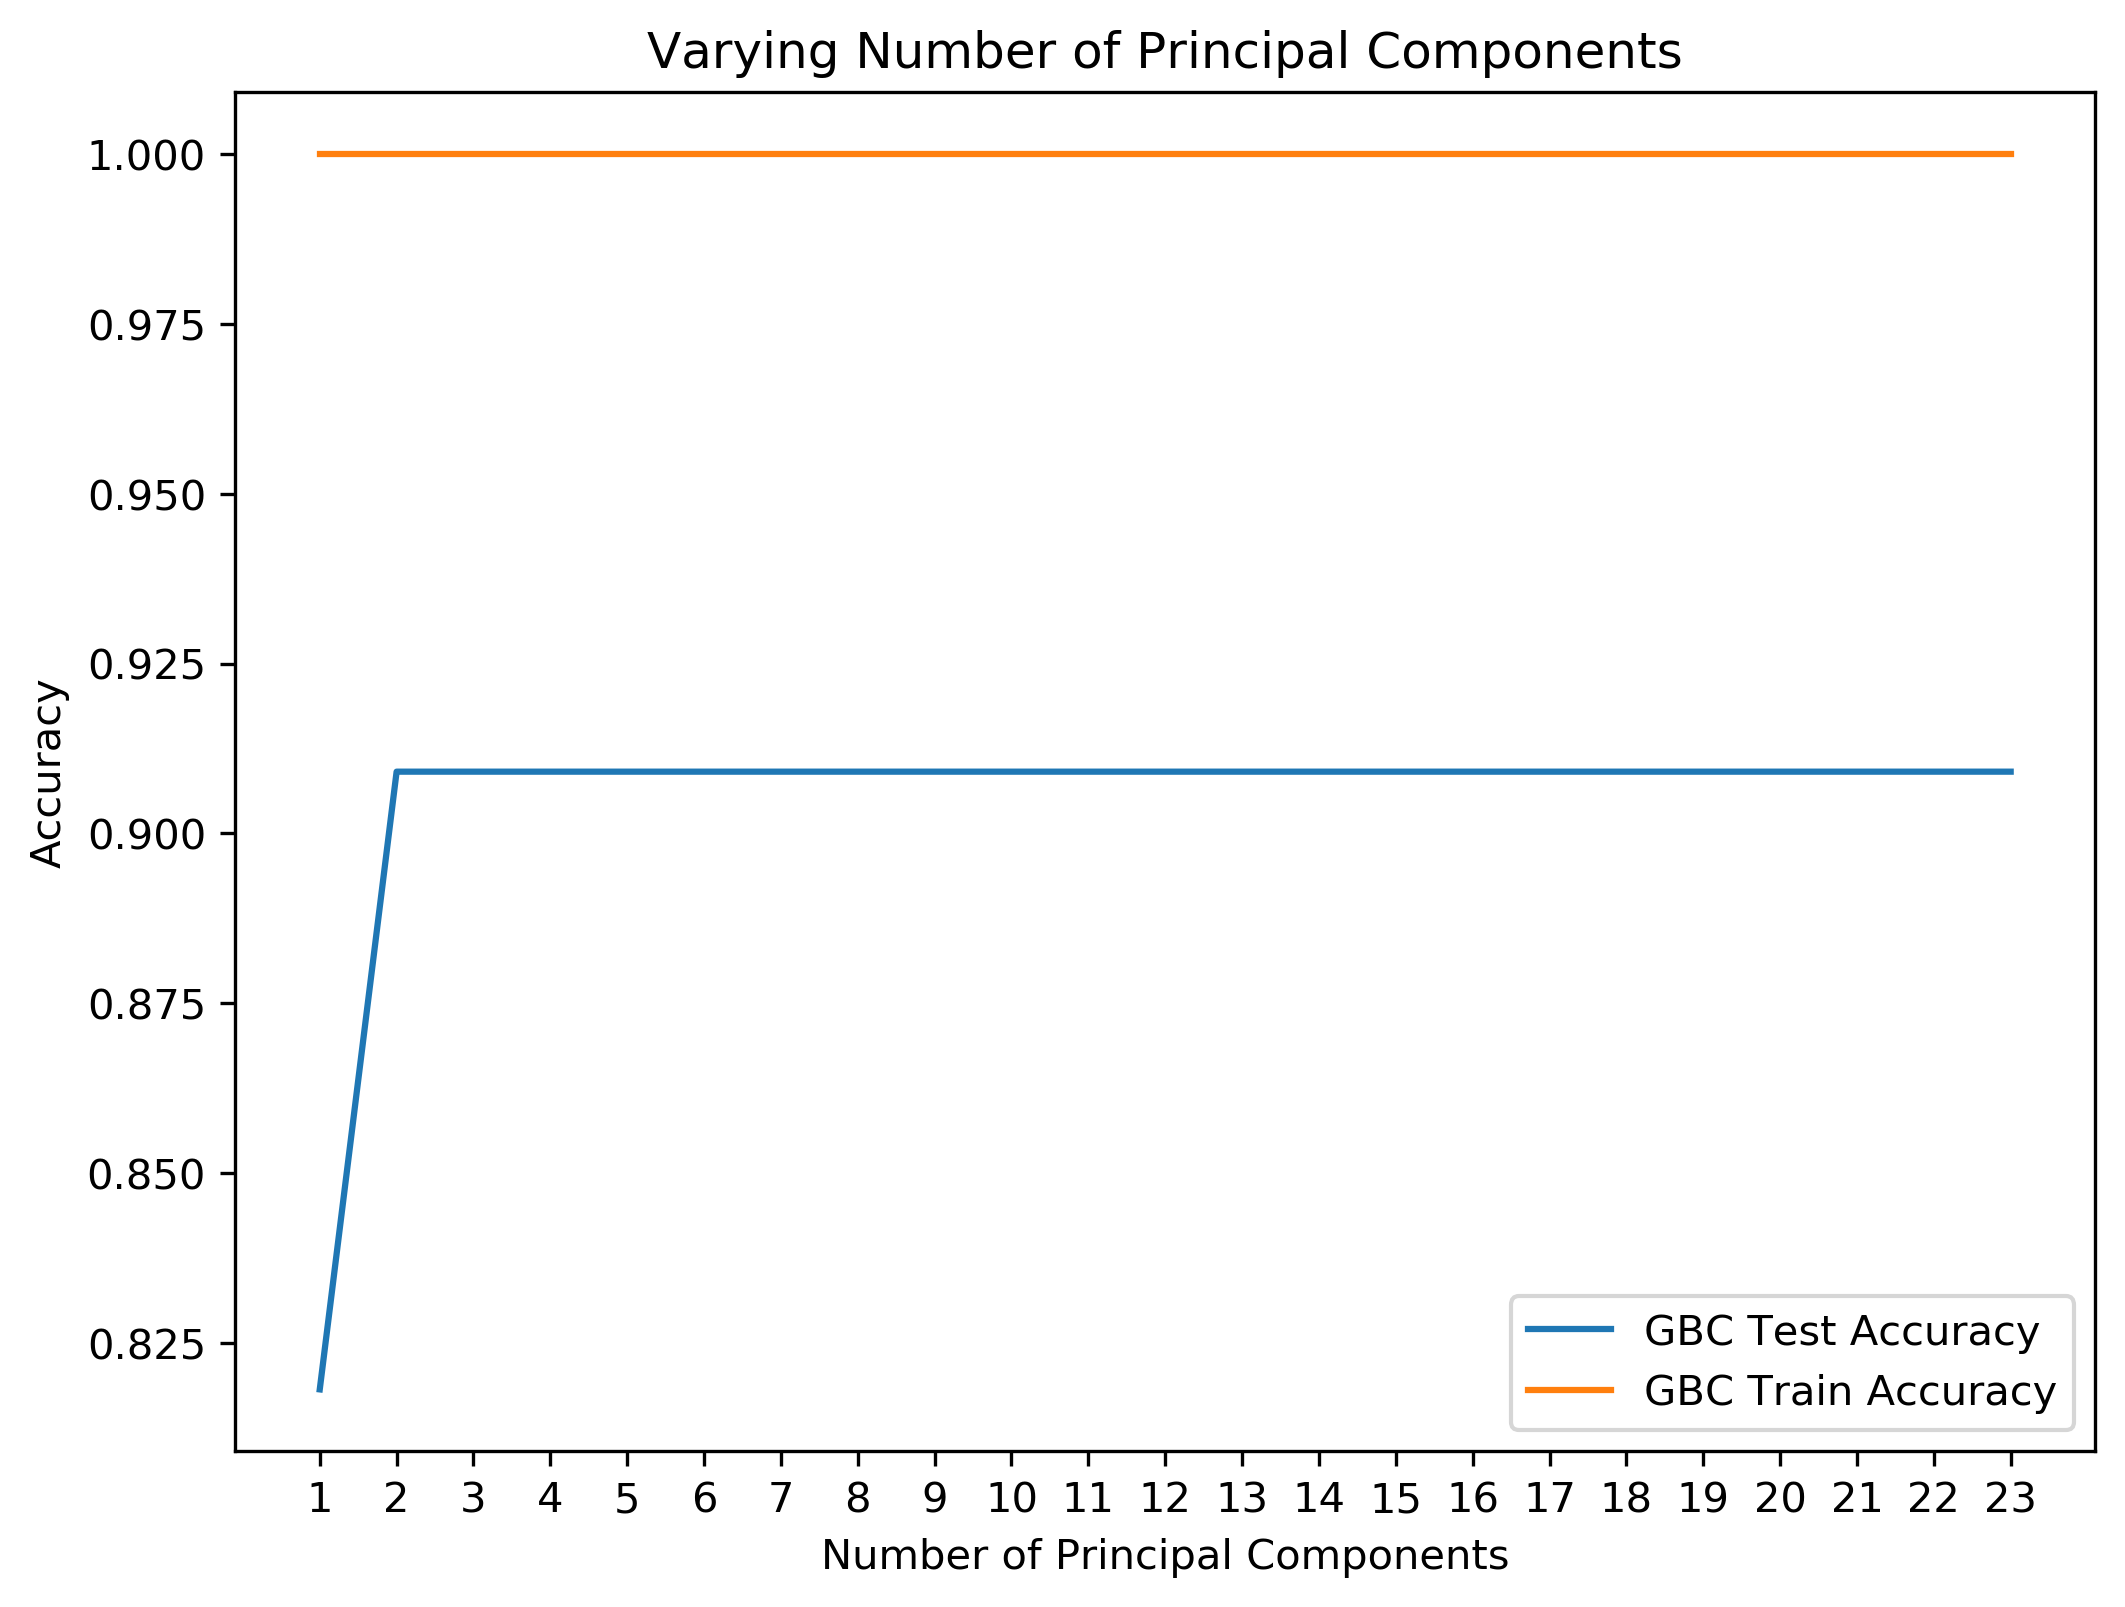

In [49]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a LDA Classifier with default hyperparameter settings
    GBC_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', GradientBoostingClassifier())])
    
    # Fit DT pipeline to to the training data
    GBC_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_GBC[i] = GBC_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_GBC[i] = GBC_pipe.score(X_test, y_test)
    
    
# Generate plot 
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principal Components')
plt.plot(n_components, test_accuracy_GBC, label = 'GBC Test Accuracy')
plt.plot(n_components, train_accuracy_GBC, label = 'GBC Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

Lowest optimum number of principal components observed is 2 for GBC. 

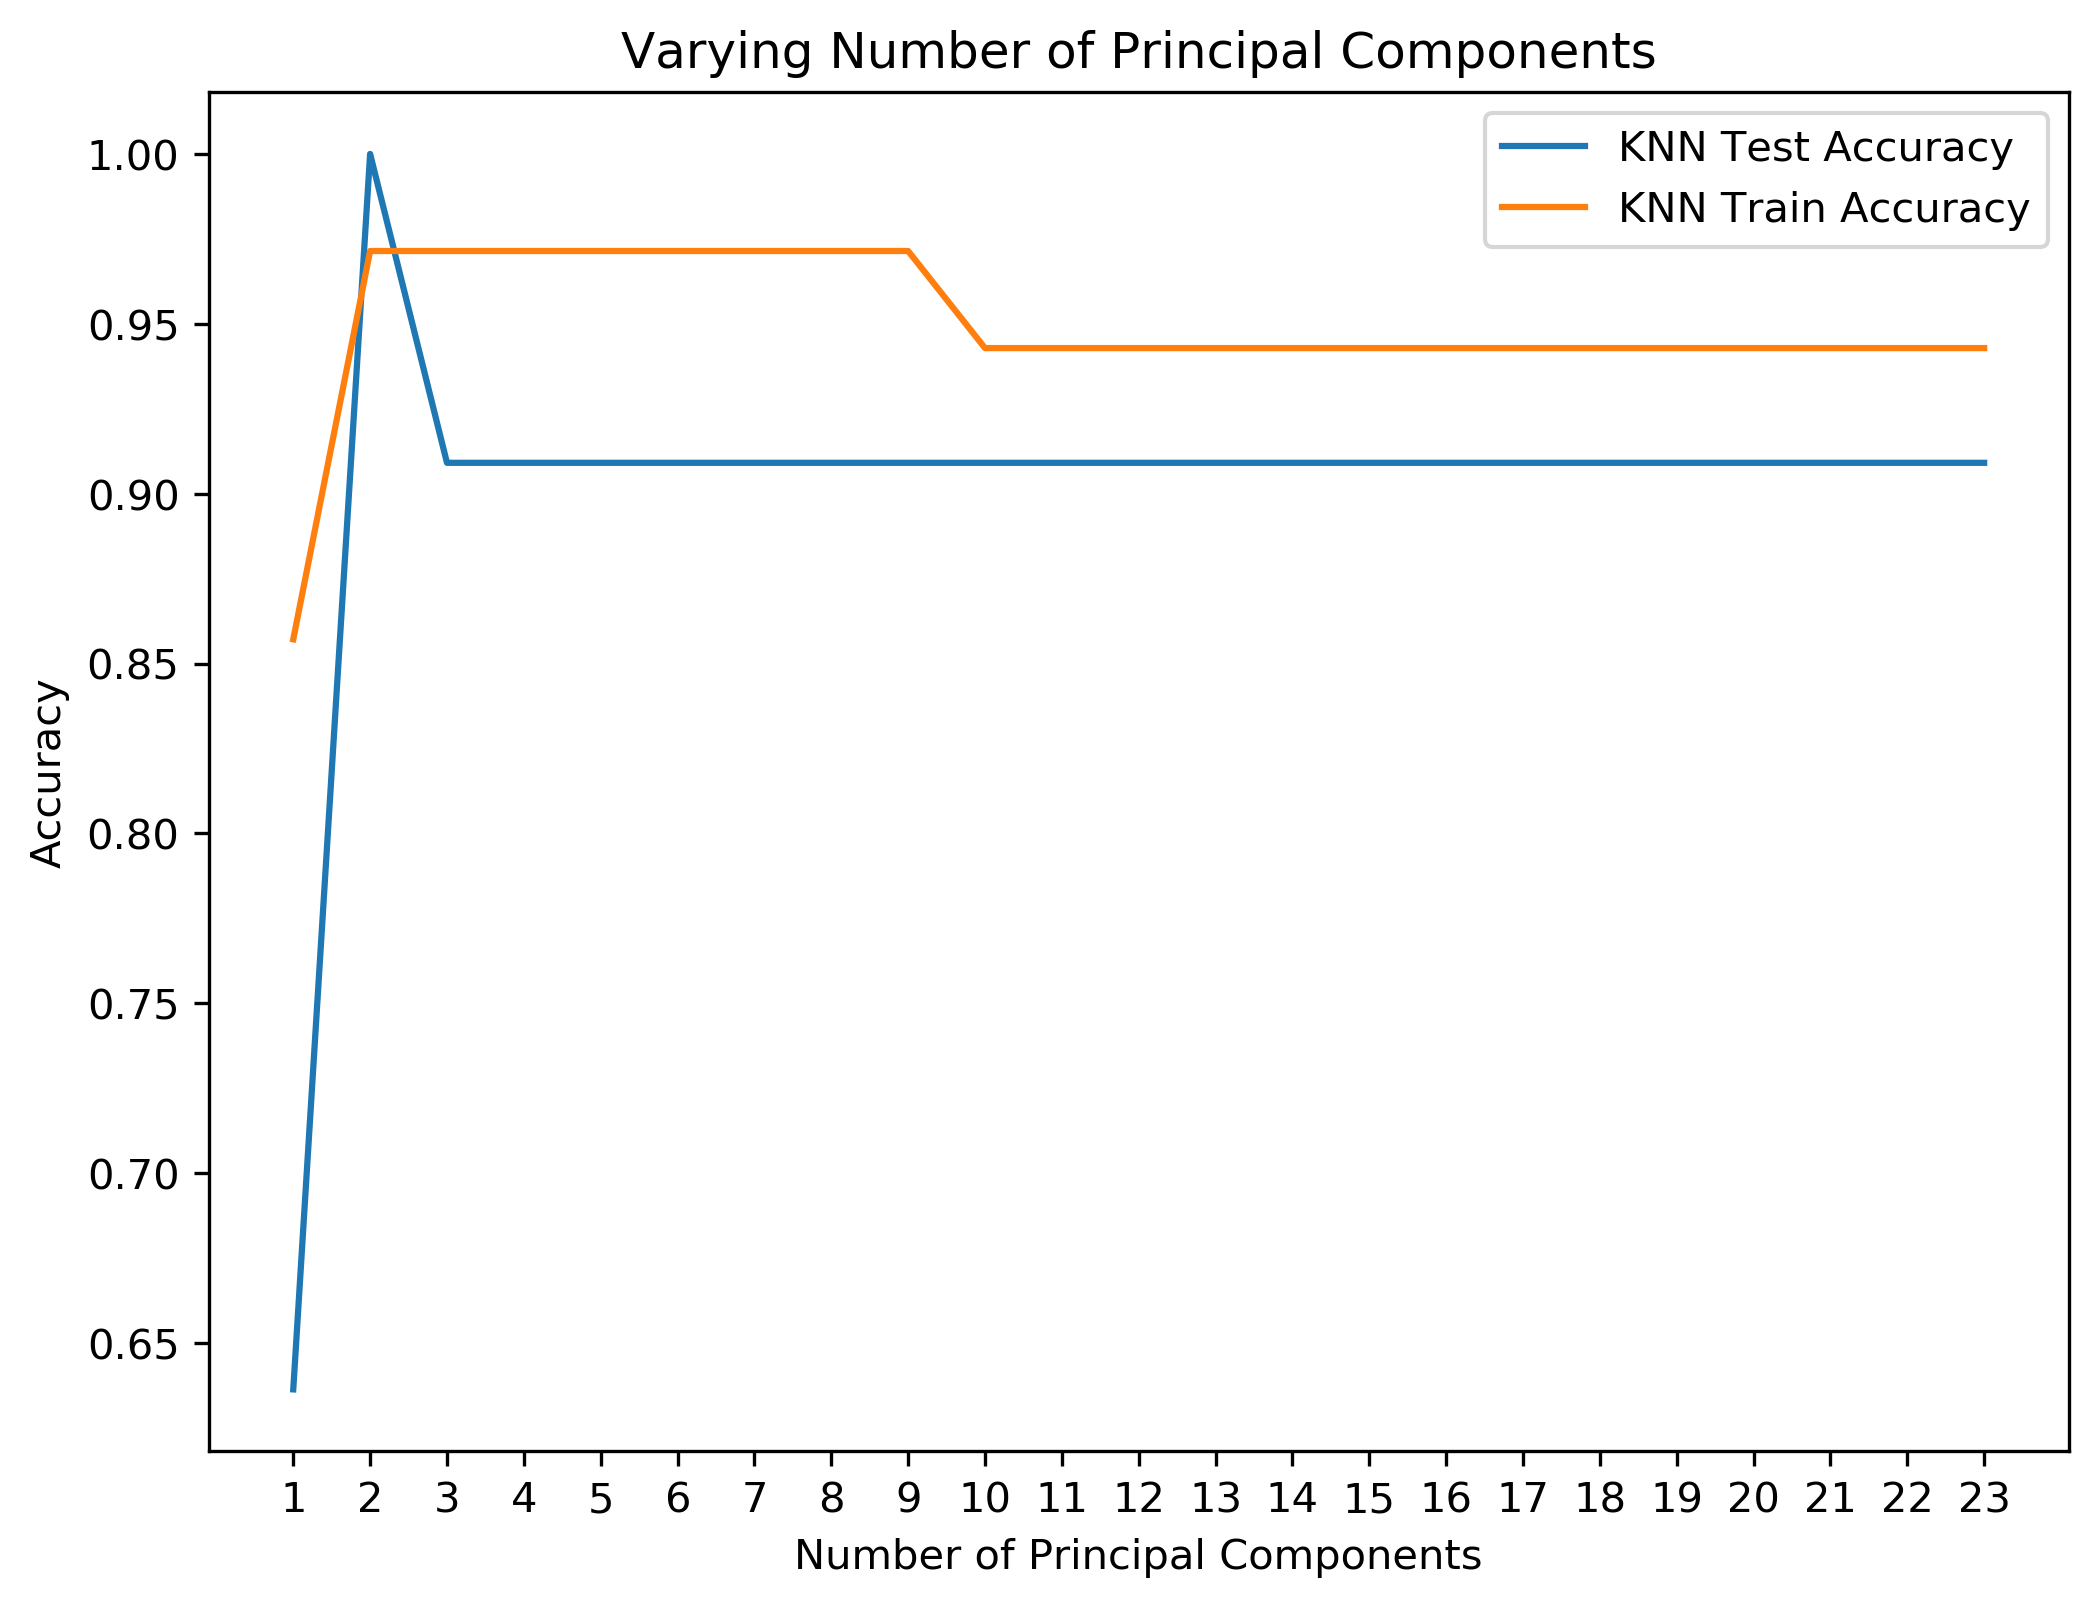

In [50]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a KNN Classifier with default hyperparameter settings
    KNN_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', KNeighborsClassifier())])
    
    # Fit KNN pipeline to to the training data
    KNN_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_KNN[i] = KNN_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_KNN[i] = KNN_pipe.score(X_test, y_test)
    
# Generate plot
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principal Components')
plt.plot(n_components, test_accuracy_KNN, label = 'KNN Test Accuracy')
plt.plot(n_components, train_accuracy_KNN, label = 'KNN Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

Lowest optimum number of principal components observed is 2 for KNN. 

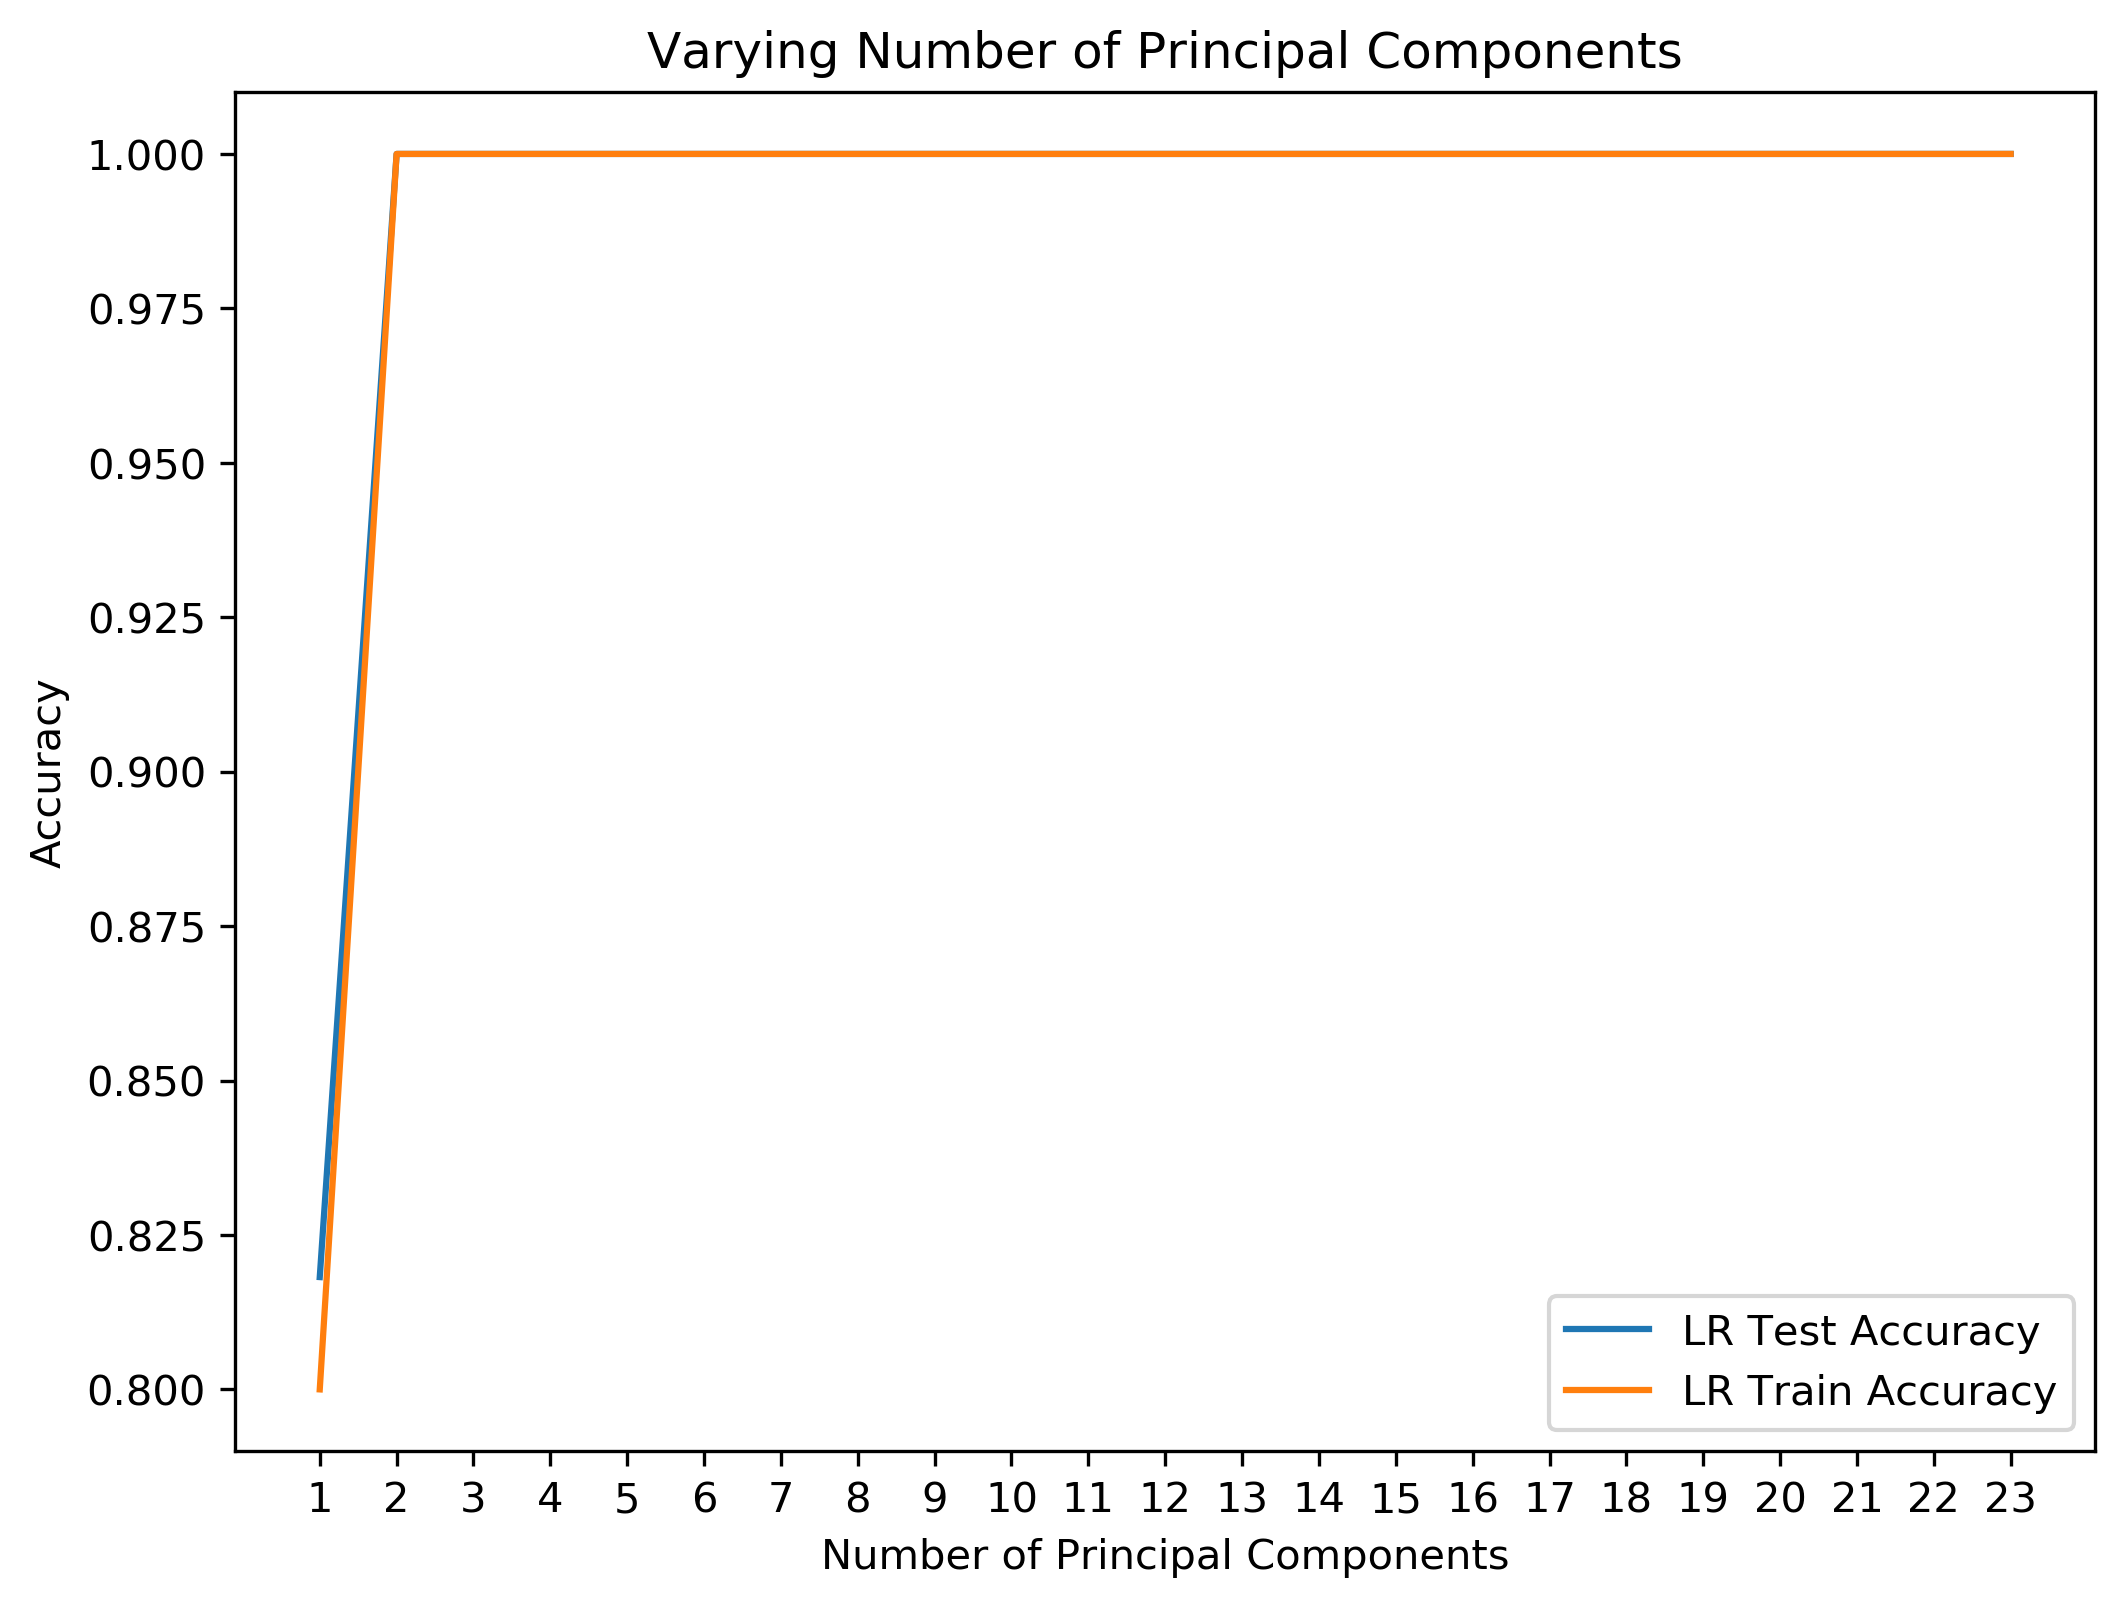

In [51]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a LR Classifier with default hyperparameter settings
    LR_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', LogisticRegression())])
    
    # Fit LR pipeline to to the training data
    LR_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_LR[i] = LR_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_LR[i] = LR_pipe.score(X_test, y_test)
    
# Generate plot
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principal Components')
plt.plot(n_components, test_accuracy_LR, label = 'LR Test Accuracy')
plt.plot(n_components, train_accuracy_LR, label = 'LR Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()
    

Lowest optimum number of principal components observed is 2 for LR. 

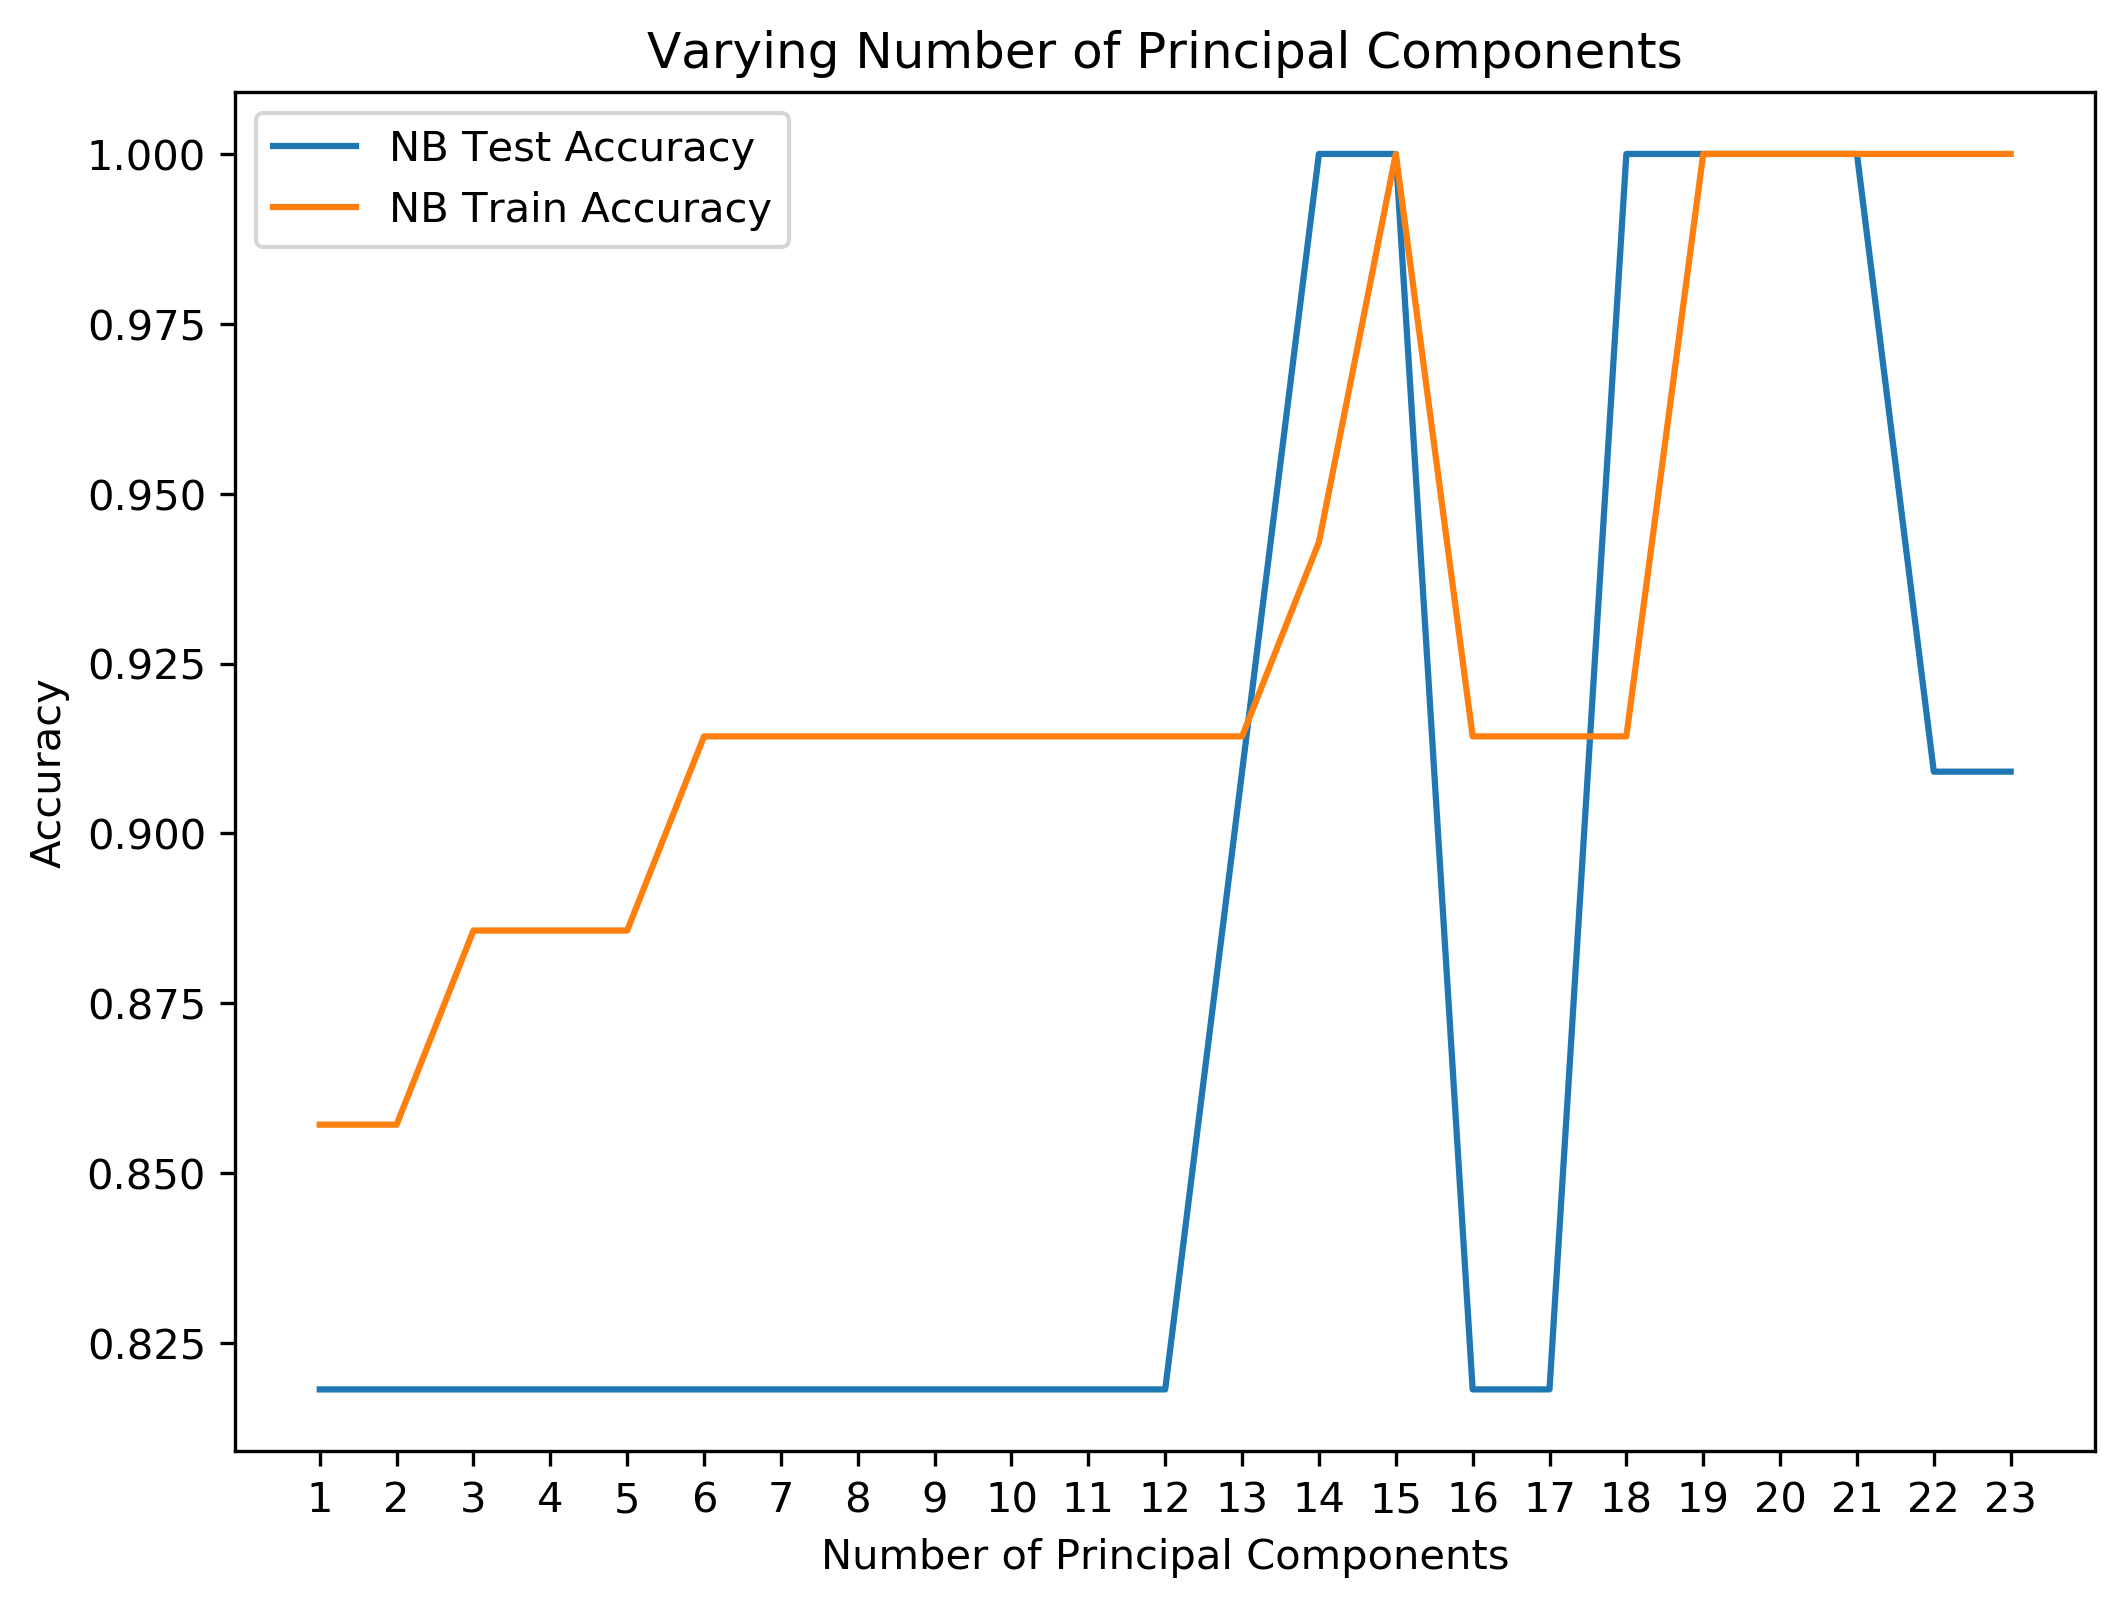

In [52]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a NB Classifier with default hyperparameter settings
    NB_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', GaussianNB())])
    
    # Fit NB pipeline to to the training data
    NB_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_NB[i] = NB_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_NB[i] = NB_pipe.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principal Components')
plt.plot(n_components, test_accuracy_NB, label = 'NB Test Accuracy')
plt.plot(n_components, train_accuracy_NB, label = 'NB Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()
    

Lowest optimum number of principal components observed is 6 not 15 for NB. However, n_components should be less than the minimum of n_samples and n_features, given theres 11 samples in our test set and 13 in our hold out then the lowest optimum PC is 6. 

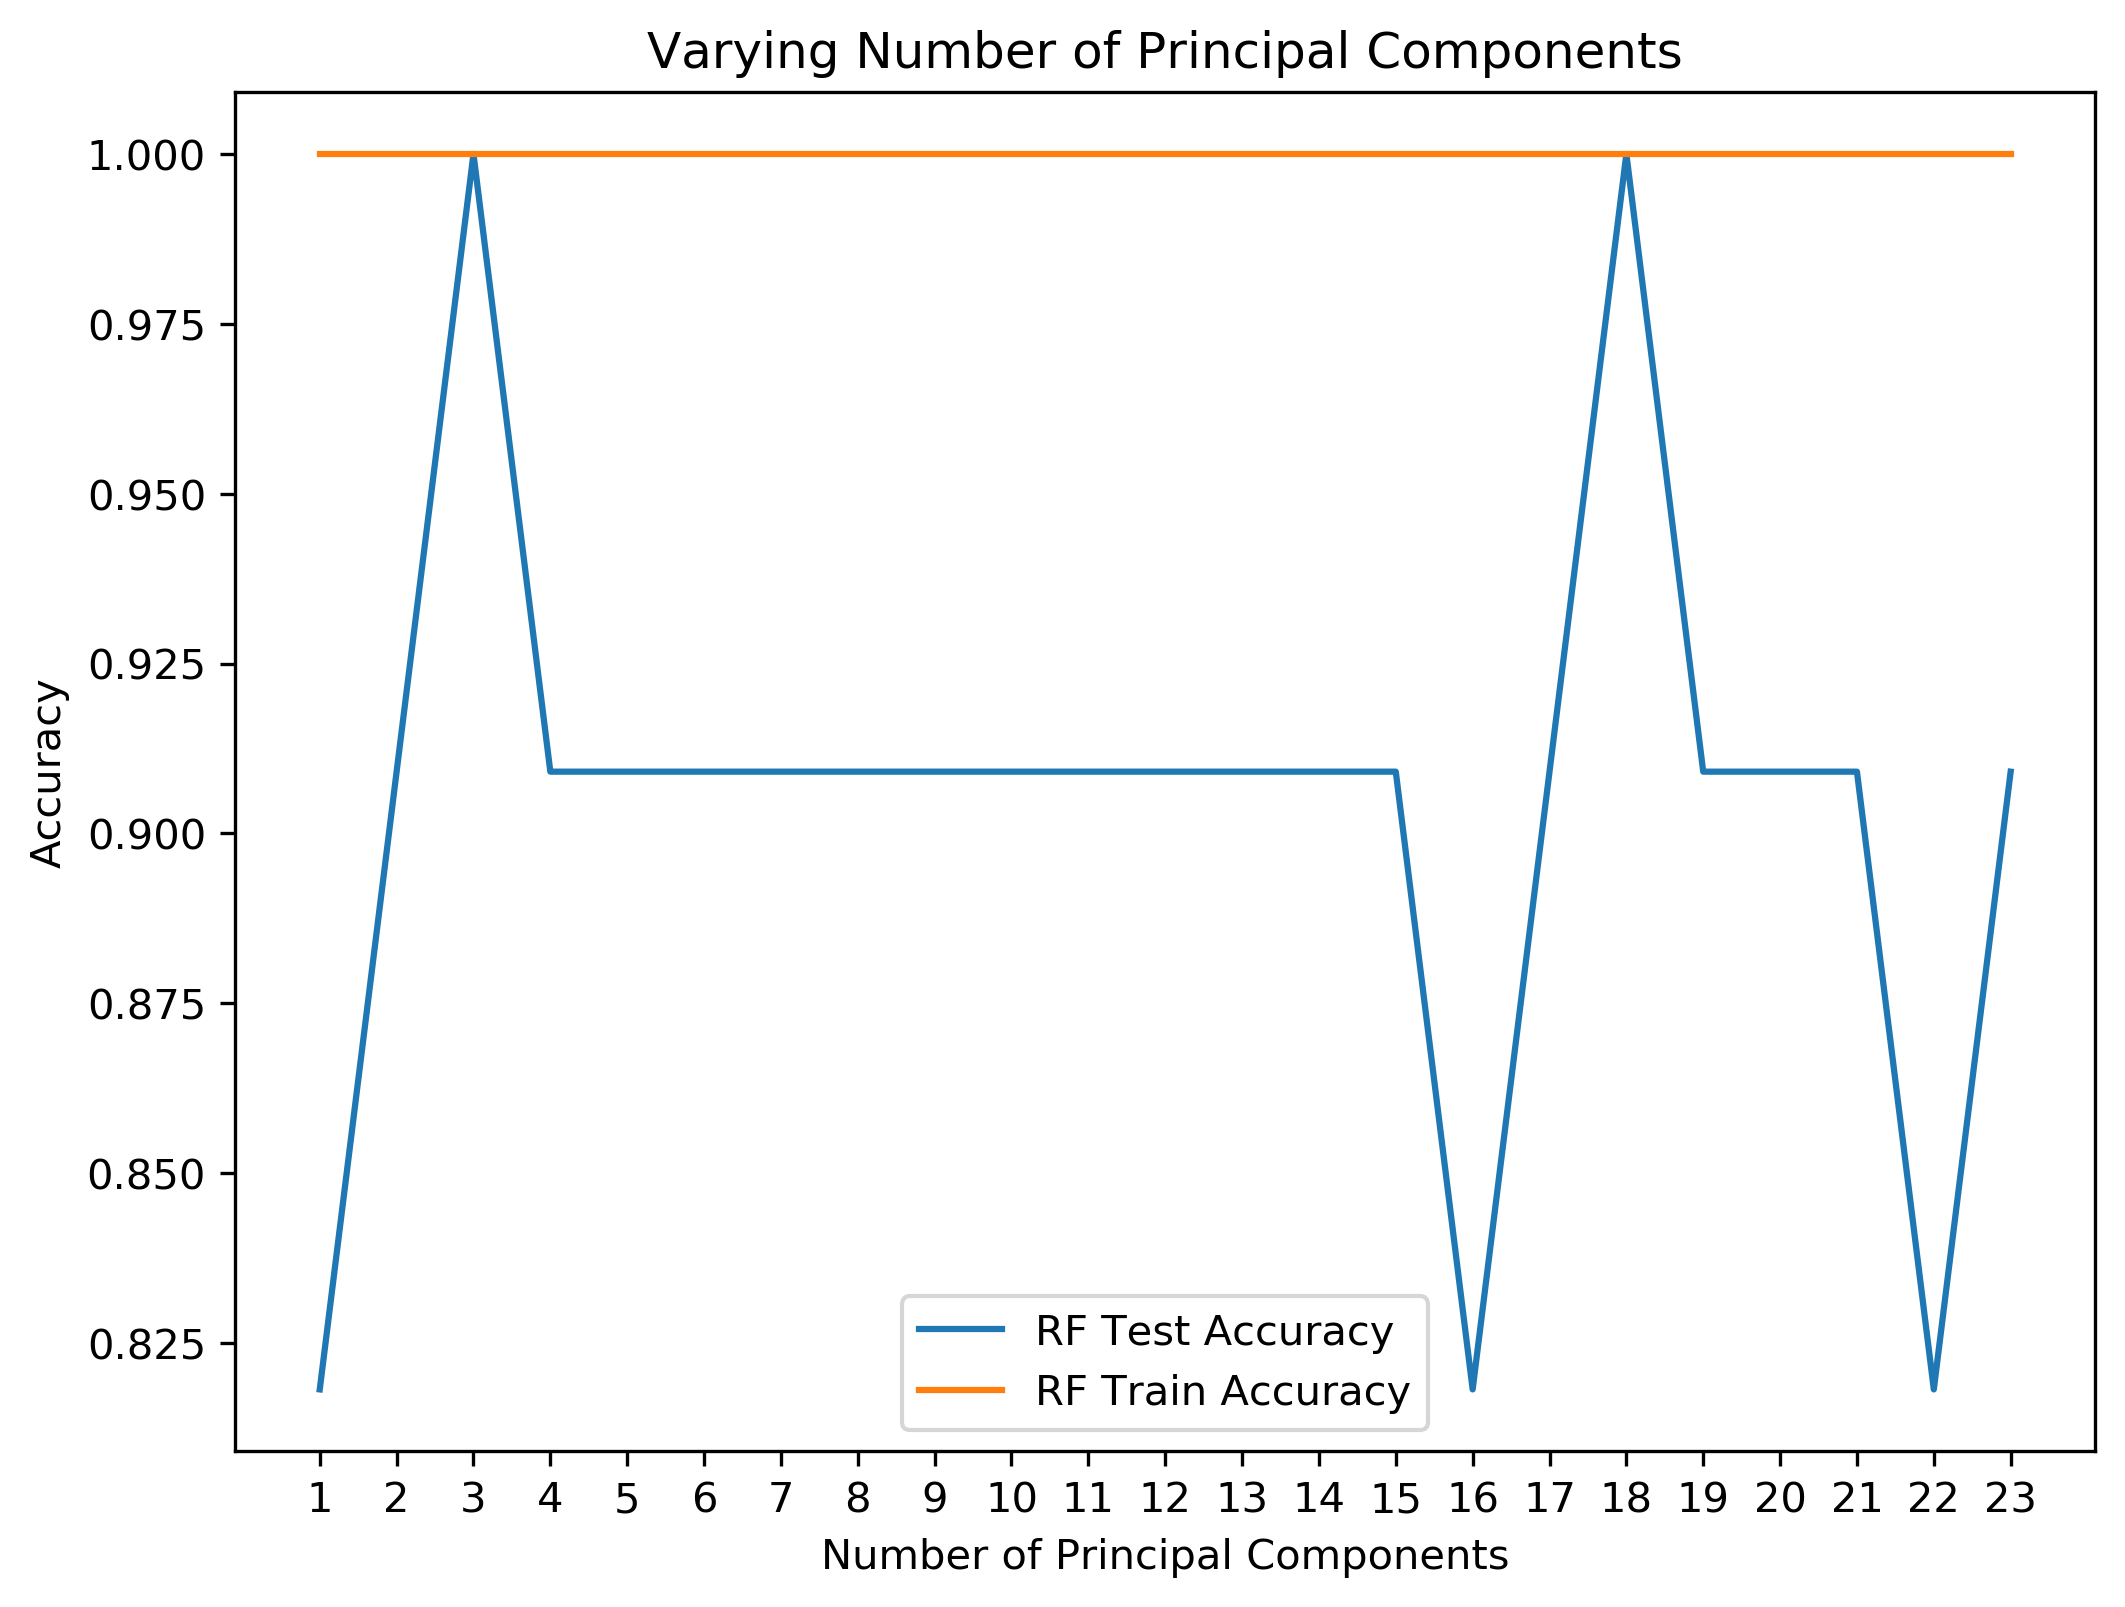

In [53]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a RF Classifier with default hyperparameter settings
    RF_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', RandomForestClassifier())])
    
    # Fit RF pipeline to to the training data
    RF_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_RF[i] = RF_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_RF[i] = RF_pipe.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principal Components')
plt.plot(n_components, test_accuracy_RF, label = 'RF Test Accuracy')
plt.plot(n_components, train_accuracy_RF, label = 'RF Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

Lowest optimum number of principal components observed is 3 for RF. 

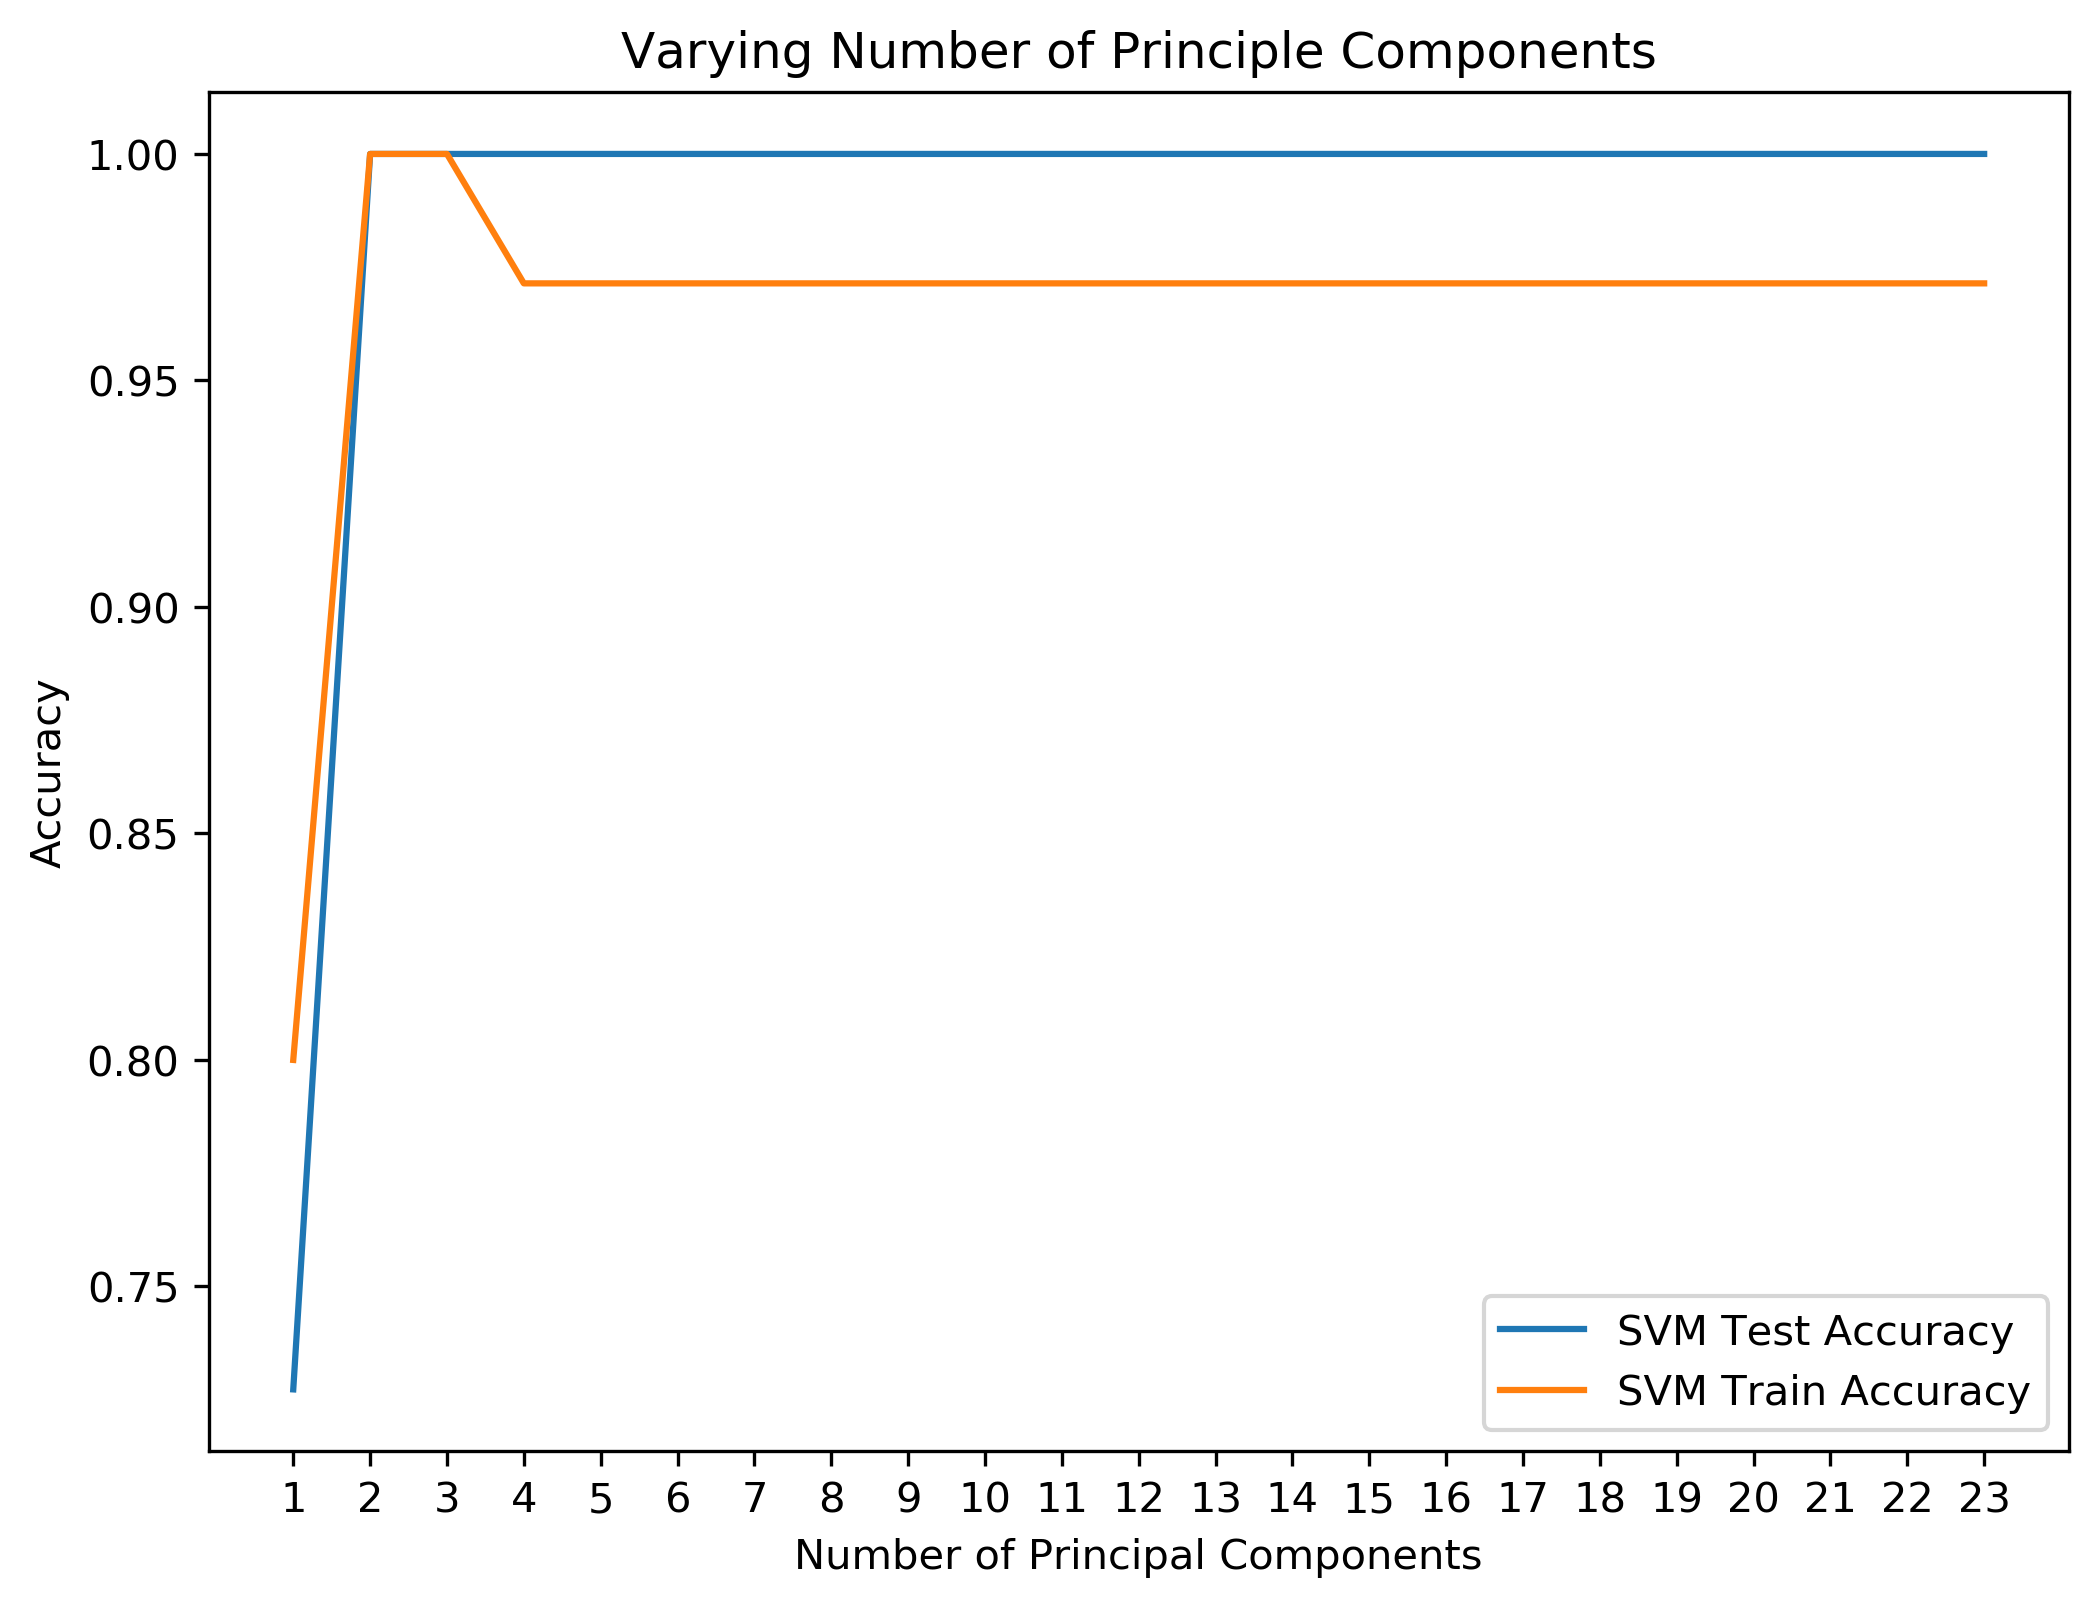

In [54]:
# Loop over different values of principal components
for i, k in enumerate(n_components):
    
    # Setup a pipeline with a SVM Classifier with default hyperparameter settings
    SVM_pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', SVC())])
    
    # Fit SVM pipeline to to the training data
    SVM_pipe.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy_SVM[i] = SVM_pipe.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy_SVM[i] = SVM_pipe.score(X_test, y_test)
    
# Generate plot
plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(range(1, 24))
plt.title('Varying Number of Principle Components')
plt.plot(n_components, test_accuracy_SVM, label = 'SVM Test Accuracy')
plt.plot(n_components, train_accuracy_SVM, label = 'SVM Train Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

Lowest optimum number of principal components observed is 2 for SVM. 

## Hyperparameter Tunning
Finding the optimal hyperparameters for each model. Setting n_jobs=-1 in the cross validation parameters means that the computation will be dispatched on all the CPUs of the computer. Alternatively, the scoring argument can be provided to specify an alternative scoring method.

### DT Hyperparameter Tunning 
Best: 0.633333 using {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 595}
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 595}
Tuned Decision Tree Accuracy: 0.6333333333333334

In [55]:
# Setup the parameters and distributions in a dict directly as it includes randint function which reads as a float which is not supported
# Max features must be equal or below the number of PC for DT which is 2
DT = DecisionTreeClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": randint(1, 2),
              "min_samples_leaf": randint(1, 1000),
              "criterion": ["gini", "entropy"]}

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = RandomizedSearchCV(DT, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search and assign variable
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameters: {}".format(grid_result.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(grid_result.best_score_))

Best: 0.633333 using {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 595}
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 595}
Tuned Decision Tree Accuracy: 0.6333333333333334


In [56]:
# Summarise the mean test score, standard deviation and parameters for each combination. 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.633333 (0.092796) with: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 595}
0.633333 (0.092796) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 542}
0.633333 (0.092796) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 919}
0.633333 (0.092796) with: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 360}
0.633333 (0.092796) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 340}
0.633333 (0.092796) with: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 365}
0.633333 (0.092796) with: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 678}
0.633333 (0.092796) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 655}
0.633333 (0.092796) with: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 141}
0

### GBC  Hyperparameter Tunning 
Best: 0.971678 using {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}
Tuned Gradient Boosting Parameters: {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}
Tuned Gradient Boosting Accuracy: 0.971677559912854

In [8]:
# Define models and parameters
GBC = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# Define Grid parameters 
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)

# Define Grid search
grid_search = RandomizedSearchCV(GBC, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search and assign variable
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned Gradient Boosting Parameters: {}".format(grid_result.best_params_))
print("Tuned Gradient Boosting Accuracy: {}".format(grid_result.best_score_))

Best: 0.971678 using {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}
Tuned Gradient Boosting Parameters: {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}
Tuned Gradient Boosting Accuracy: 0.971677559912854


In [9]:
# Summarise the mean test score, standard deviation and parameters for each combination. 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.629085 (0.017974) with: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 9, 'learning_rate': 0.001}
0.858388 (0.111282) with: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01}
0.971678 (0.042804) with: {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}
0.629085 (0.017974) with: {'subsample': 0.7, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.01}
0.924292 (0.053012) with: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}
0.829521 (0.090848) with: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01}
0.971678 (0.042804) with: {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1}
0.629085 (0.017974) with: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}
0.952614 (0.038471) with: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.01}
0.847495 (0.086126) with: {'subsample': 0.5, 'n_estimat

### KNN Hyperparameter Tunning 
Best: 0.975000 using {'weights': 'distance', 'n_neighbors': 2, 'metric': 'euclidean'}
Tuned k-Nearest Neighbours Parameters: {'weights': 'distance', 'n_neighbors': 2, 'metric': 'euclidean'}
Tuned k-Nearest Neighbours Accuracy: 0.975

In [41]:
# Define models and parameters, number of neighbours set depending on graph analysis, 11 samples in test set. 
# n_neighbors must be less than number of samples in test and hold out set so > 11. 
KNN = KNeighborsClassifier()
n_neighbors = range(1, 10) 
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Define grid
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = RandomizedSearchCV(KNN, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search and assign variable
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned k-Nearest Neighbours Parameters: {}".format(grid_result.best_params_))
print("Tuned k-Nearest Neighbours Accuracy: {}".format(grid_result.best_score_))

Best: 0.975000 using {'weights': 'distance', 'n_neighbors': 1, 'metric': 'minkowski'}
Tuned k-Nearest Neighbours Parameters: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'minkowski'}
Tuned k-Nearest Neighbours Accuracy: 0.975


In [76]:
# Define models and parameters, number of neighbours set depending on graph analysis, 11 samples in test set. 
# n_neighbors must be less than number of samples in test and hold out set so > 11. 
KNN = KNeighborsClassifier()
n_neighbors = list(range(1, 11)) 
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Define grid
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = RandomizedSearchCV(KNN, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search and assign variable
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned k-Nearest Neighbours Parameters: {}".format(grid_result.best_params_))
print("Tuned k-Nearest Neighbours Accuracy: {}".format(grid_result.best_score_))

Best: 0.975000 using {'weights': 'distance', 'n_neighbors': 2, 'metric': 'euclidean'}
Tuned k-Nearest Neighbours Parameters: {'weights': 'distance', 'n_neighbors': 2, 'metric': 'euclidean'}
Tuned k-Nearest Neighbours Accuracy: 0.975


In [42]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.958333 (0.093169) with: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'minkowski'}
0.958333 (0.093169) with: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'euclidean'}
0.891667 (0.149304) with: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}
0.958333 (0.093169) with: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}
0.694444 (0.162921) with: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
0.975000 (0.075000) with: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'minkowski'}
0.694444 (0.162921) with: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}
0.958333 (0.093169) with: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'minkowski'}
0.975000 (0.075000) with: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'minkowski'}
0.975000 (0.075000) with: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean'}


### LR Hyperparameter Tunning 
Best: 0.971678 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Tuned Logistic Regression Accuracy: 0.971677559912854

In [17]:
# Define model and parameters
LR = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define Grid
param_grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = RandomizedSearchCV(LR, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search and assign variable
grid_result = grid_search.fit(X_train, y_train)

# Summarize best parameter results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameters: {}".format(grid_result.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(grid_result.best_score_))


Best: 0.971678 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Tuned Logistic Regression Accuracy: 0.971677559912854


In [18]:
# Summarise the mean test score, standard deviation and parameters for each combination. 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.971678 (0.028343) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.971678 (0.028343) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.971678 (0.028343) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.971678 (0.028343) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
0.971678 (0.028343) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
0.971678 (0.028343) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.971678 (0.028343) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
0.971678 (0.028343) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.971678 (0.028343) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.971678 (0.028343) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}


### NB Hyperparameter Tunning 
Best: 0.988889 using {'var_smoothing': 1e-08}
Tuned Naive Bayes Parameters: {'var_smoothing': 1e-08}
Tuned Naive Bayes Accuracy: 0.9888888888888888

In [19]:
# Define models and parameters
NB = GaussianNB()
var_smoothing = np.logspace(0,-9, num=100)

# Define parameter grid
param_grid = dict(var_smoothing=var_smoothing)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = RandomizedSearchCV(NB, param_grid, n_jobs=-1, cv=cv, verbose=1, scoring='accuracy',error_score=0)

# Fit Grid search onto training data 
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned Naive Bayes Parameters: {}".format(grid_result.best_params_))
print("Tuned Naive Bayes Accuracy: {}".format(grid_result.best_score_))

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.6s


Best: 0.988889 using {'var_smoothing': 1e-08}
Tuned Naive Bayes Parameters: {'var_smoothing': 1e-08}
Tuned Naive Bayes Accuracy: 0.9888888888888888


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


In [20]:
# Summarise the mean test score, standard deviation and parameters for each combination. 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.988889 (0.059835) with: {'var_smoothing': 1e-08}
0.861111 (0.168508) with: {'var_smoothing': 1.0}
0.958333 (0.107044) with: {'var_smoothing': 3.511191734215127e-05}
0.916667 (0.129099) with: {'var_smoothing': 0.0002310129700083158}
0.916667 (0.129099) with: {'var_smoothing': 0.001}
0.980556 (0.073546) with: {'var_smoothing': 1.873817422860383e-08}
0.958333 (0.107044) with: {'var_smoothing': 2.848035868435799e-06}
0.958333 (0.107044) with: {'var_smoothing': 2.310129700083158e-05}
0.966667 (0.100000) with: {'var_smoothing': 1.873817422860387e-09}
0.791667 (0.180982) with: {'var_smoothing': 0.04328761281083057}


### RF Hyperparameter Tunning 
Best: 0.902778 using {'max_features': 'sqrt', 'n_estimators': 100}
Tuned Random Forest Parameters: {'max_features': 'sqrt', 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.9027777777777778

In [24]:
# Define models and parameters
RF = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# Define parameter grid
param_grid = dict(n_estimators=n_estimators,max_features=max_features)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = GridSearchCV(RF, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search onto training data 
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned Random Forest Parameters: {}".format(grid_result.best_params_))
print("Tuned Random Forest Accuracy: {}".format(grid_result.best_score_))

Best: 0.902778 using {'max_features': 'sqrt', 'n_estimators': 100}
Tuned Random Forest Parameters: {'max_features': 'sqrt', 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.9027777777777778


In [25]:
# Summarise the mean test score, standard deviation and parameters for each combination. 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.850000 (0.169967) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.902778 (0.144471) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.902778 (0.144471) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.686111 (0.241219) with: {'max_features': 'log2', 'n_estimators': 10}
0.780556 (0.160271) with: {'max_features': 'log2', 'n_estimators': 100}
0.836111 (0.176755) with: {'max_features': 'log2', 'n_estimators': 1000}


### SVM Hyperparameter Tunning 
Best: 0.976667 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Random Forest Parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Random Forest Accuracy: 0.9766666666666667

In [27]:
# Define model and parameters
SVM = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# Define parameter grid 
param_grid = dict(kernel=kernel,C=C,gamma=gamma)

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Grid search
grid_search = GridSearchCV(SVM, param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Fit Grid search onto training data
grid_result = grid_search.fit(X_train, y_train)

# Summarise results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the optimal parameters and best score
print("Tuned Random Forest Parameters: {}".format(grid_result.best_params_))
print("Tuned Random Forest Accuracy: {}".format(grid_result.best_score_))

Best: 0.976667 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Random Forest Parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Random Forest Accuracy: 0.9766666666666667


In [28]:
# Summarise the mean test score, standard deviation and parameters for each combination. 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.811667 (0.193943) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.976667 (0.070396) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.900000 (0.119722) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.730000 (0.157903) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.976667 (0.070396) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.956667 (0.101434) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.676667 (0.131487) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.940000 (0.112842) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.940000 (0.112842) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.610000 (0.080000) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.610000 (0.080000) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.610000 (0.080000) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.610000 (0.080000) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.610000 (0.080000) with: {'C': 0.01, 'gamma': '

## Model Assessment of Validation Test Set & Hold Out Set with Optimal Principal Components and Hyperparameters
Using the optimum number of PCs and hyperparamter settings for each model we will now build our models using these on our training and validation datasets. 

#### Load Hold Out Dataset

In [39]:
# Insert the desired path containing combined hold out data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/combined_hold_out/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file and build hold out dataframe 
hold_out_data = np.load('combined_hold_out_test.npy', allow_pickle=True)
hold_out_df = pd.DataFrame(hold_out_data)

# Create feature and target arrays
X_hold_out = hold_out_df.drop(101300, axis=1) 
y_hold_out = hold_out_df[101300].astype('int') #last column is the modified or not modified feature

#### Pipeline Setup

In [78]:
# Setup a pipeline with a DT Classifier with adjusted hyperparameter settings
DT_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=1,min_samples_leaf=595))])

# Setup a pipeline with GBC with adjusted hyperparameter settings
GBC_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', GradientBoostingClassifier(subsample=1.0,n_estimators=1000,max_depth=7,learning_rate=0.1))])

# Setup a pipeline with a KNN Classifier with adjusted hyperparameter settings
KNN_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', KNeighborsClassifier(weights='distance',n_neighbors=2,metric='euclidean'))])

# Setup a pipeline with a LR Classifier with adjusted hyperparameter settings
LR_pipe = Pipeline([
        ('reducer', PCA(n_components=2)),
        ('classifier', LogisticRegression(solver='liblinear',penalty='l2',C=100))])
    
# Setup a pipeline with a NB Classifier with adjusted hyperparameter settings
NB_pipe = Pipeline([
            ('reducer', PCA(n_components=6)),
            ('classifier', GaussianNB(var_smoothing=1e-08))])

# Setup a pipeline with a RF Classifier with adjusted hyperparameter settings
RF_pipe = Pipeline([
            ('reducer', PCA(n_components=3)),
            ('classifier', RandomForestClassifier(max_features='sqrt',n_estimators=100))])
    
# Setup a pipeline with a SVM Classifier with adjusted hyperparameter settings
SVM_pipe = Pipeline([
            ('reducer', PCA(n_components=2)),
            ('classifier', SVC(C=50,gamma='scale',kernel='rbf'))])

# Define scoring parameters that will go into cross_validate
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc'}

# Set up repeated k-fold cross validation parameters
# Error if 10 or 5 splits; greater than the number of members in each class; only 11 in test set.
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)


### DT Model Assessment
=== Decision Tree Validation Dataset Scores ===
Average Test Accuracy: 0.639 (0.104)
Average Fit Time: 0.712 (0.166)
Average Score Time: 0.712 (0.166)
Average Fit Test ROC & AUC: 0.712 (0.166)

=== Decision Tree Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.617 (0.103)
Average Hold Out Fit Time: 0.663 (0.085)
Average Hold Out Score Time: 0.609 (0.133)
Average Hold Out Test ROC & AUC: 0.500 (0.000)

In [42]:
# Fit pipeline to to the training data
DT_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(DT_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1)

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(DT_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== Decision Tree Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== Decision Tree Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))


=== Decision Tree Validation Dataset Scores ===
Average Test Accuracy: 0.639 (0.104)
Average Fit Time: 0.712 (0.166)
Average Score Time: 0.712 (0.166)
Average Fit Test ROC & AUC: 0.712 (0.166)


=== Decision Tree Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.617 (0.103)
Average Hold Out Fit Time: 0.663 (0.085)
Average Hold Out Score Time: 0.609 (0.133)
Average Hold Out Test ROC & AUC: 0.500 (0.000)


### GBC Model Assessment
=== Gradient Boosting Classifer Validation Dataset Scores ===
Average Test Accuracy: 0.906 (0.136)
Average Fit Time: 2.260 (0.159)
Average Score Time: 2.260 (0.159)
Average Fit Test ROC & AUC: 2.260 (0.159)

=== Gradient Boosting Classifer Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.940 (0.136)
Average Hold Out Fit Time: 2.150 (0.060)
Average Hold Out Score Time: 0.773 (0.090)
Average Hold Out Test ROC & AUC: 0.939 (0.138)

In [43]:
# Fit pipeline to to the training data
GBC_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(GBC_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1)

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(GBC_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== Gradient Boosting Classifer Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== Gradient Boosting Classifer Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))

=== Gradient Boosting Classifer Validation Dataset Scores ===
Average Test Accuracy: 0.906 (0.136)
Average Fit Time: 2.260 (0.159)
Average Score Time: 2.260 (0.159)
Average Fit Test ROC & AUC: 2.260 (0.159)


=== Gradient Boosting Classifer Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.940 (0.136)
Average Hold Out Fit Time: 2.150 (0.060)
Average Hold Out Score Time: 0.773 (0.090)
Average Hold Out Test ROC & AUC: 0.939 (0.138)


### KNN Model Assessment
=== k-Nearest Neighbours Validation Dataset Scores ===
Average Test Accuracy: 0.983 (0.062)
Average Fit Time: 0.898 (0.226)
Average Score Time: 0.898 (0.226)
Average Fit Test ROC & AUC: 0.898 (0.226)

=== k-Nearest Neighbours Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 1.033 (0.118)
Average Hold Out Score Time: 0.882 (0.105)
Average Hold Out Test ROC & AUC: 1.000 (0.000)

In [80]:
# Fit pipeline to to the training data
KNN_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(KNN_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1)

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(KNN_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== k-Nearest Neighbours Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== k-Nearest Neighbours Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))

=== k-Nearest Neighbours Validation Dataset Scores ===
Average Test Accuracy: 0.983 (0.062)
Average Fit Time: 0.898 (0.226)
Average Score Time: 0.898 (0.226)
Average Fit Test ROC & AUC: 0.898 (0.226)


=== k-Nearest Neighbours Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 1.033 (0.118)
Average Hold Out Score Time: 0.882 (0.105)
Average Hold Out Test ROC & AUC: 1.000 (0.000)


### LR Model Assessment 
=== Logistic Regression Validation Dataset Scores ===
Average Test Accuracy: 0.889 (0.138)
Average Fit Time: 0.941 (0.107)
Average Score Time: 0.941 (0.107)
Average Fit Test ROC & AUC: 0.941 (0.107)


=== Logistic Regression Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 0.956 (0.103)
Average Hold Out Score Time: 0.939 (0.082)
Average Hold Out Test ROC & AUC: 1.000 (0.000)

In [55]:
# Fit pipeline to to the training data
LR_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(LR_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1)

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(LR_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== Logistic Regression Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== Logistic Regression Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))

=== Logistic Regression Validation Dataset Scores ===
Average Test Accuracy: 0.889 (0.138)
Average Fit Time: 0.941 (0.107)
Average Score Time: 0.941 (0.107)
Average Fit Test ROC & AUC: 0.941 (0.107)


=== Logistic Regression Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 0.956 (0.103)
Average Hold Out Score Time: 0.939 (0.082)
Average Hold Out Test ROC & AUC: 1.000 (0.000)


### NB Model Assessment
=== Naive Bayes Validation Dataset Scores ===
Average Test Accuracy: 0.817 (0.213)
Average Fit Time: 0.621 (0.158)
Average Score Time: 0.621 (0.158)
Average Fit Test ROC & AUC: 0.621 (0.158)

=== Naive Bayes Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.830 (0.139)
Average Hold Out Fit Time: 0.993 (0.221)
Average Hold Out Score Time: 0.740 (0.225)
Average Hold Out Test ROC & AUC: 0.933 (0.143)

In [56]:
# Fit pipeline to to the training data
NB_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(NB_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1, error_score="raise")

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(NB_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== Naive Bayes Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== Naive Bayes Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))

=== Naive Bayes Validation Dataset Scores ===
Average Test Accuracy: 0.817 (0.213)
Average Fit Time: 0.621 (0.158)
Average Score Time: 0.621 (0.158)
Average Fit Test ROC & AUC: 0.621 (0.158)


=== Naive Bayes Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.830 (0.139)
Average Hold Out Fit Time: 0.993 (0.221)
Average Hold Out Score Time: 0.740 (0.225)
Average Hold Out Test ROC & AUC: 0.933 (0.143)


### RF Model Assessment
=== Random Forest Validation Dataset Scores ===
Average Test Accuracy: 0.894 (0.131)
Average Fit Time: 1.458 (0.318)
Average Score Time: 1.458 (0.318)
Average Fit Test ROC & AUC: 1.458 (0.318)

=== Random Forest Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.907 (0.136)
Average Hold Out Fit Time: 1.567 (0.075)
Average Hold Out Score Time: 0.837 (0.098)
Average Hold Out Test ROC & AUC: 0.972 (0.072)

In [57]:
# Fit pipeline to to the training data
RF_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(RF_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1)

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(RF_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== Random Forest Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== Random Forest Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))

=== Random Forest Validation Dataset Scores ===
Average Test Accuracy: 0.894 (0.131)
Average Fit Time: 1.458 (0.318)
Average Score Time: 1.458 (0.318)
Average Fit Test ROC & AUC: 1.458 (0.318)


=== Random Forest Hold Out Dataset Scores ===
Average Hold Out Accuracy: 0.907 (0.136)
Average Hold Out Fit Time: 1.567 (0.075)
Average Hold Out Score Time: 0.837 (0.098)
Average Hold Out Test ROC & AUC: 0.972 (0.072)


### SVM Model Assessment
=== Support Vector Machines Validation Dataset Scores ===
Average Test Accuracy: 1.000 (0.000)
Average Fit Time: 0.679 (0.188)
Average Score Time: 0.679 (0.188)
Average Fit Test ROC & AUC: 0.679 (0.188)


=== Support Vector Machines Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 0.599 (0.096)
Average Hold Out Score Time: 0.513 (0.048)
Average Hold Out Test ROC & AUC: 1.000 (0.000)

In [58]:
# Fit pipeline to to the training data
SVM_pipe.fit(X_train, y_train)

# Use the cross_validate function to see what happens in each fold
test_validate = cross_validate(SVM_pipe, X_test, y_test, cv=cv, scoring=scoring, n_jobs=-1)

# Compute parameters on the set, use the cross_validate function to see what happens in each fold
hold_out_validate = cross_validate(SVM_pipe, X_hold_out, y_hold_out, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
test_accuracy = np.mean(test_validate['test_accuracy']), np.std(test_validate['test_accuracy'])
test_fit_time = np.mean(test_validate['fit_time']), np.std(test_validate['fit_time'])
test_score_time = np.mean(test_validate['score_time']), np.std(test_validate['score_time'])
test_roc_auc = np.mean(test_validate['test_roc_auc']), np.std(test_validate['test_roc_auc'])

# Extract the specific values from the cross validation of the hold out set
hold_out_accuracy = np.mean(hold_out_validate['test_accuracy']), np.std(hold_out_validate['test_accuracy'])
hold_out_fit_time = np.mean(hold_out_validate['fit_time']), np.std(hold_out_validate['fit_time'])
hold_out_score_time = np.mean(hold_out_validate['score_time']), np.std(hold_out_validate['score_time'])
hold_out_roc_auc = np.mean(hold_out_validate['test_roc_auc']), np.std(hold_out_validate['test_roc_auc'])

# Report Performance
print('=== Support Vector Machines Validation Dataset Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (test_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (test_fit_time))
print('Average Score Time: %.3f (%.3f)' % (test_fit_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (test_fit_time))
print('\n')
print('=== Support Vector Machines Hold Out Dataset Scores ===')
print('Average Hold Out Accuracy: %.3f (%.3f)' % (hold_out_accuracy))
print('Average Hold Out Fit Time: %.3f (%.3f)' % (hold_out_fit_time))
print('Average Hold Out Score Time: %.3f (%.3f)' % (hold_out_score_time))
print('Average Hold Out Test ROC & AUC: %.3f (%.3f)' % (hold_out_roc_auc))

=== Support Vector Machines Validation Dataset Scores ===
Average Test Accuracy: 1.000 (0.000)
Average Fit Time: 0.679 (0.188)
Average Score Time: 0.679 (0.188)
Average Fit Test ROC & AUC: 0.679 (0.188)


=== Support Vector Machines Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 0.599 (0.096)
Average Hold Out Score Time: 0.513 (0.048)
Average Hold Out Test ROC & AUC: 1.000 (0.000)


## Validation Data Confusion Matrices & Classification Reports 

### DT Confusion Matrix & Classification Report

In [24]:
# Fit the classifier pipe to the training data
DT_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = DT_pipe.(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [5 0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       0.00      0.00      0.00         5

    accuracy                           0.55        11
   macro avg       0.27      0.50      0.35        11
weighted avg       0.30      0.55      0.39        11



/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GBC Confusion Matrix & Classification Report

In [25]:
# Fit the classifier pipe to the training data
GBC_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = GBC_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 1]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



### KNN Confusion Matrix & Classification Report

In [26]:
# Fit the classifier pipe to the training data
KNN_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = KNN_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



### LR Confusion Matrix & Classification Report

In [27]:
# Fit the classifier pipe to the training data
LR_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = LR_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



### NB Confusion Matrix & Classification Report

In [28]:
# Fit the classifier pipe to the training data
NB_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = NB_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



### RF Confusion Matrix & Classification Report

In [29]:
# Fit the classifier pipe to the training data
RF_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = RF_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



### RF Confusion Matrix & Classification Report

In [30]:
# Fit the classifier pipe to the training data
RF_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = RF_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 1]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



### SVM Confusion Matrix & Classification Report

In [31]:
# Fit the classifier pipe to the training data
SVM_pipe.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = SVM_pipe.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



## Evaluating Incorrect Modifcation Predictions 
To evaluate which spectra are being incorrectly predicted by our models we will avoid using a cross validation to avoid shuffling and folding that mix the order and position of samples in the dataframe. These positions will first need to be reset.

In [105]:
# Insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file 
loaded_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(loaded_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=1, stratify=y)

### DT Incorrect Prediction Evalution

In [140]:
# Fit pipeline to to the training data
DT_pipe.fit(X_train, y_train)

# Predict using pipeline 
DT_y_pred = DT_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(DT_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = DT_pred_df.style.set_caption("DT Incorrect Prediction Evalution")
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Unfortunately all the modified spectrum for DT were incorrectly predicted thus providing no valuable information on the quality of the spectrum themselves. 

### GBC Incorrect Prediction Evalution

In [145]:
# Fit pipeline to to the training data
GBC_pipe.fit(X_train, y_train)

# Predict using pipeline 
GBC_y_pred = KNN_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(GBC_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = pred_df.style.set_caption("GBC Incorrect Prediction Evalution")
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


GBC performs much better and it can be seen that spectrum 4 is incorrectly predicted which warrants further inspection of the spectrum. 

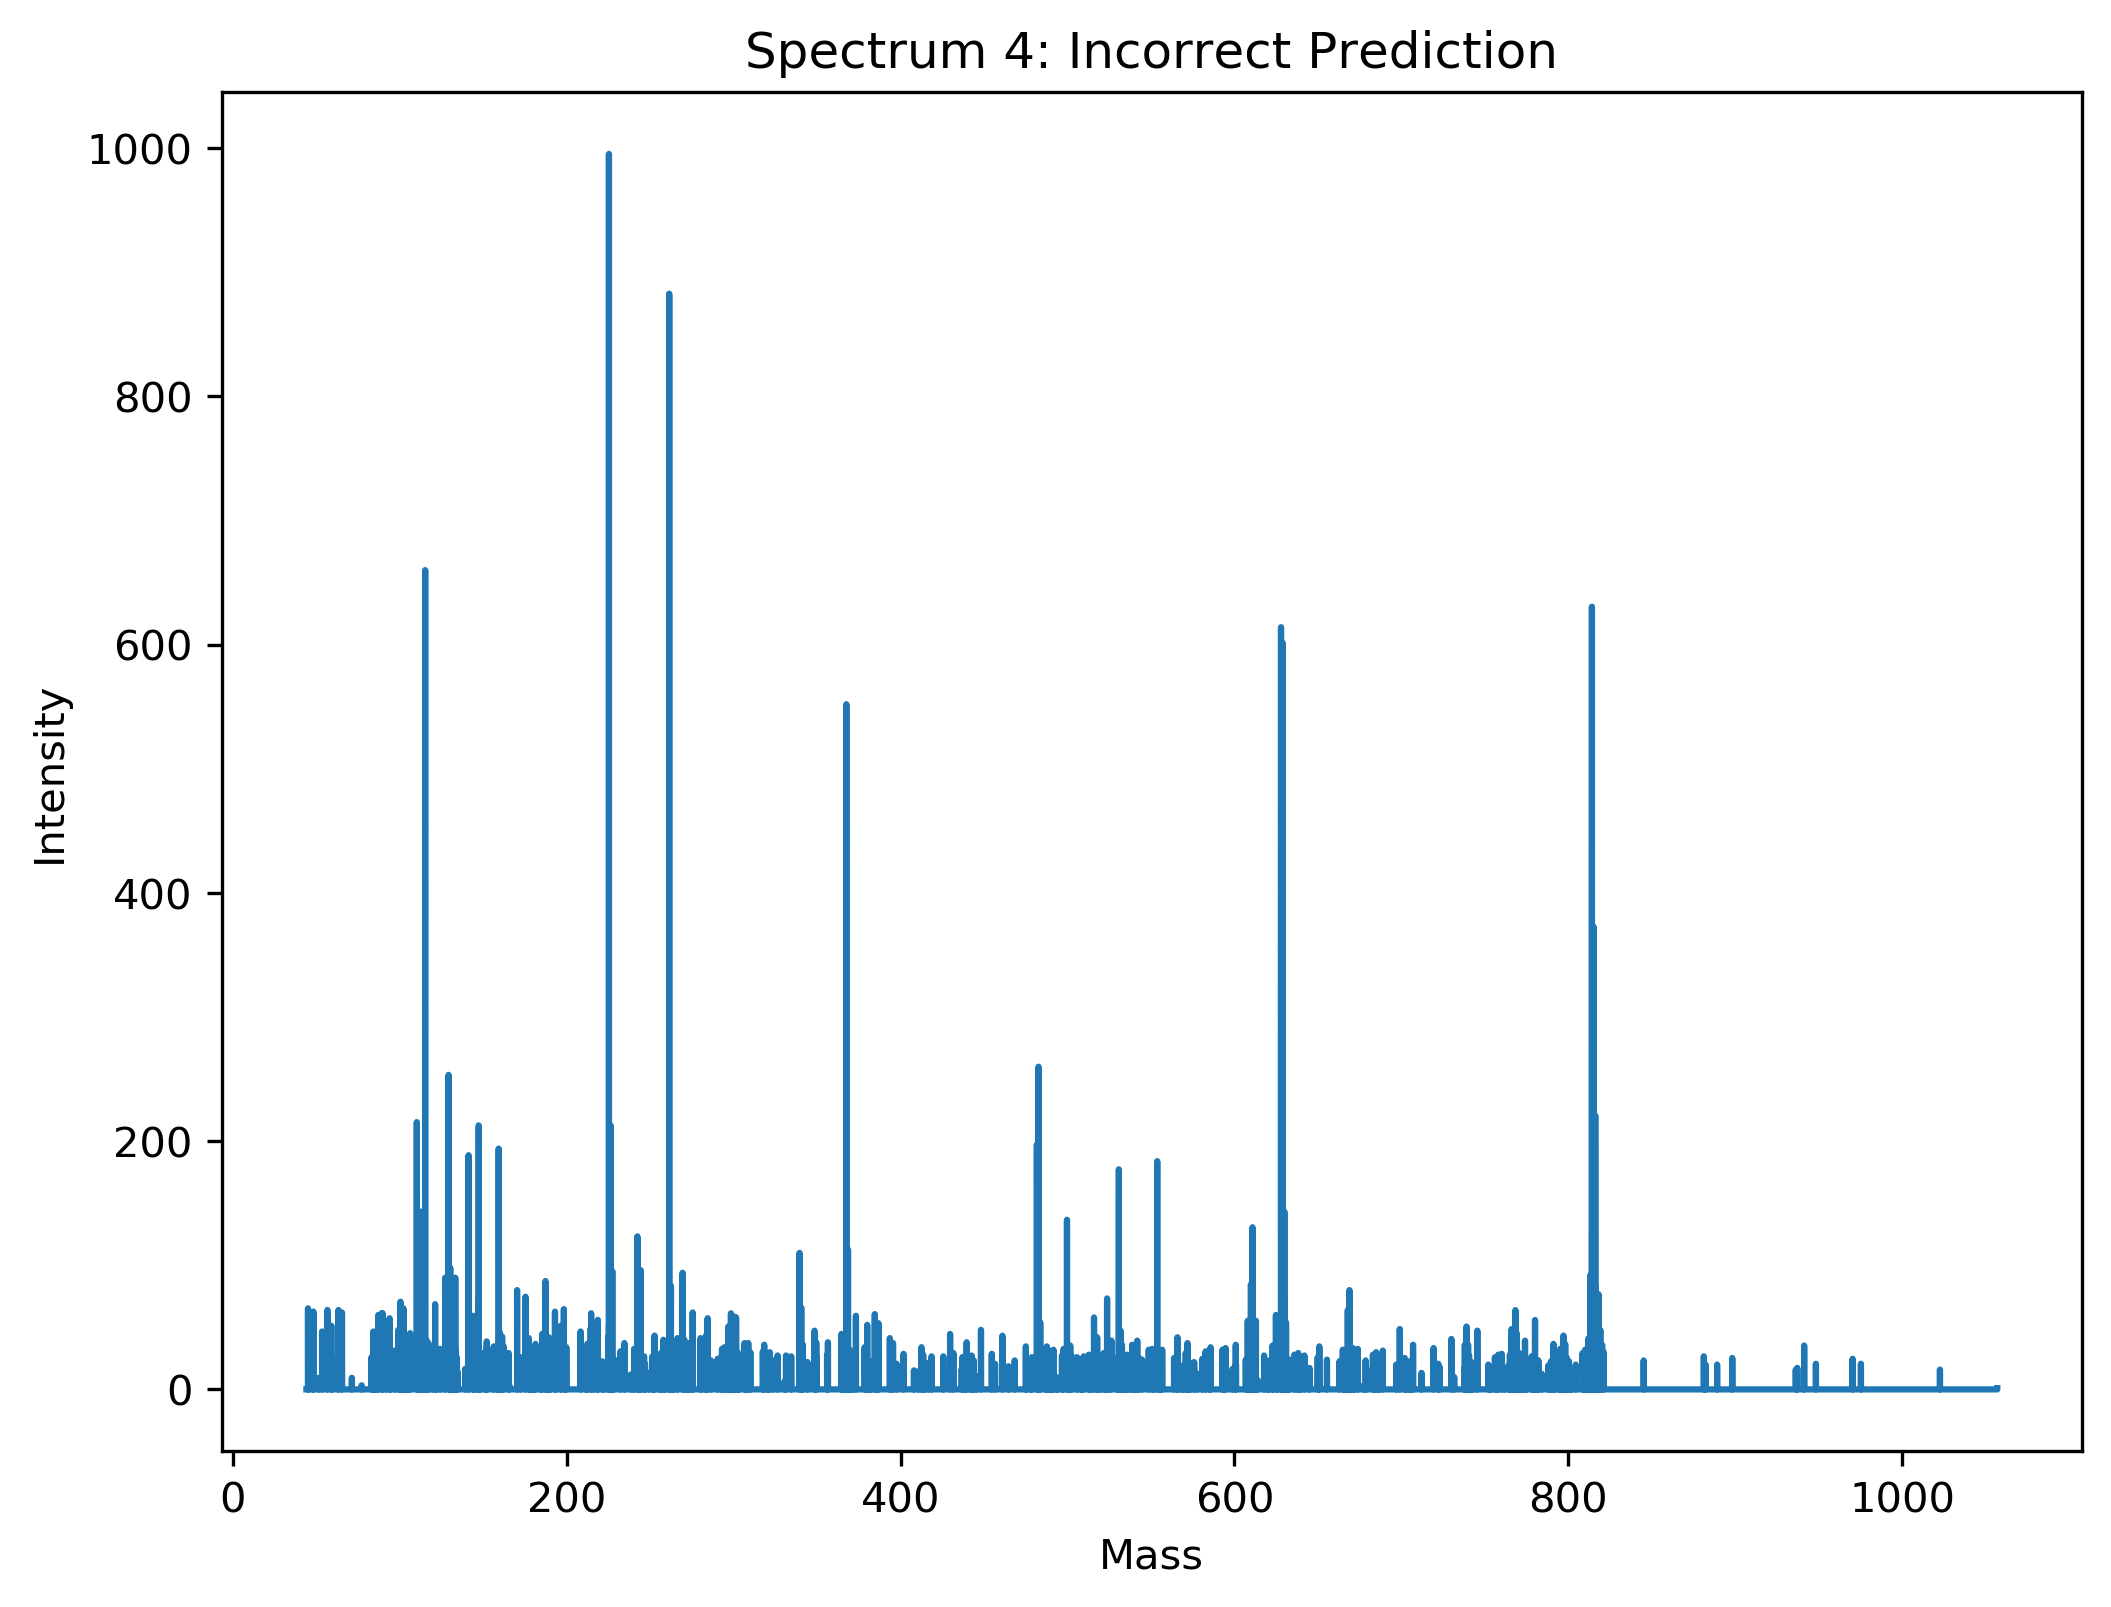

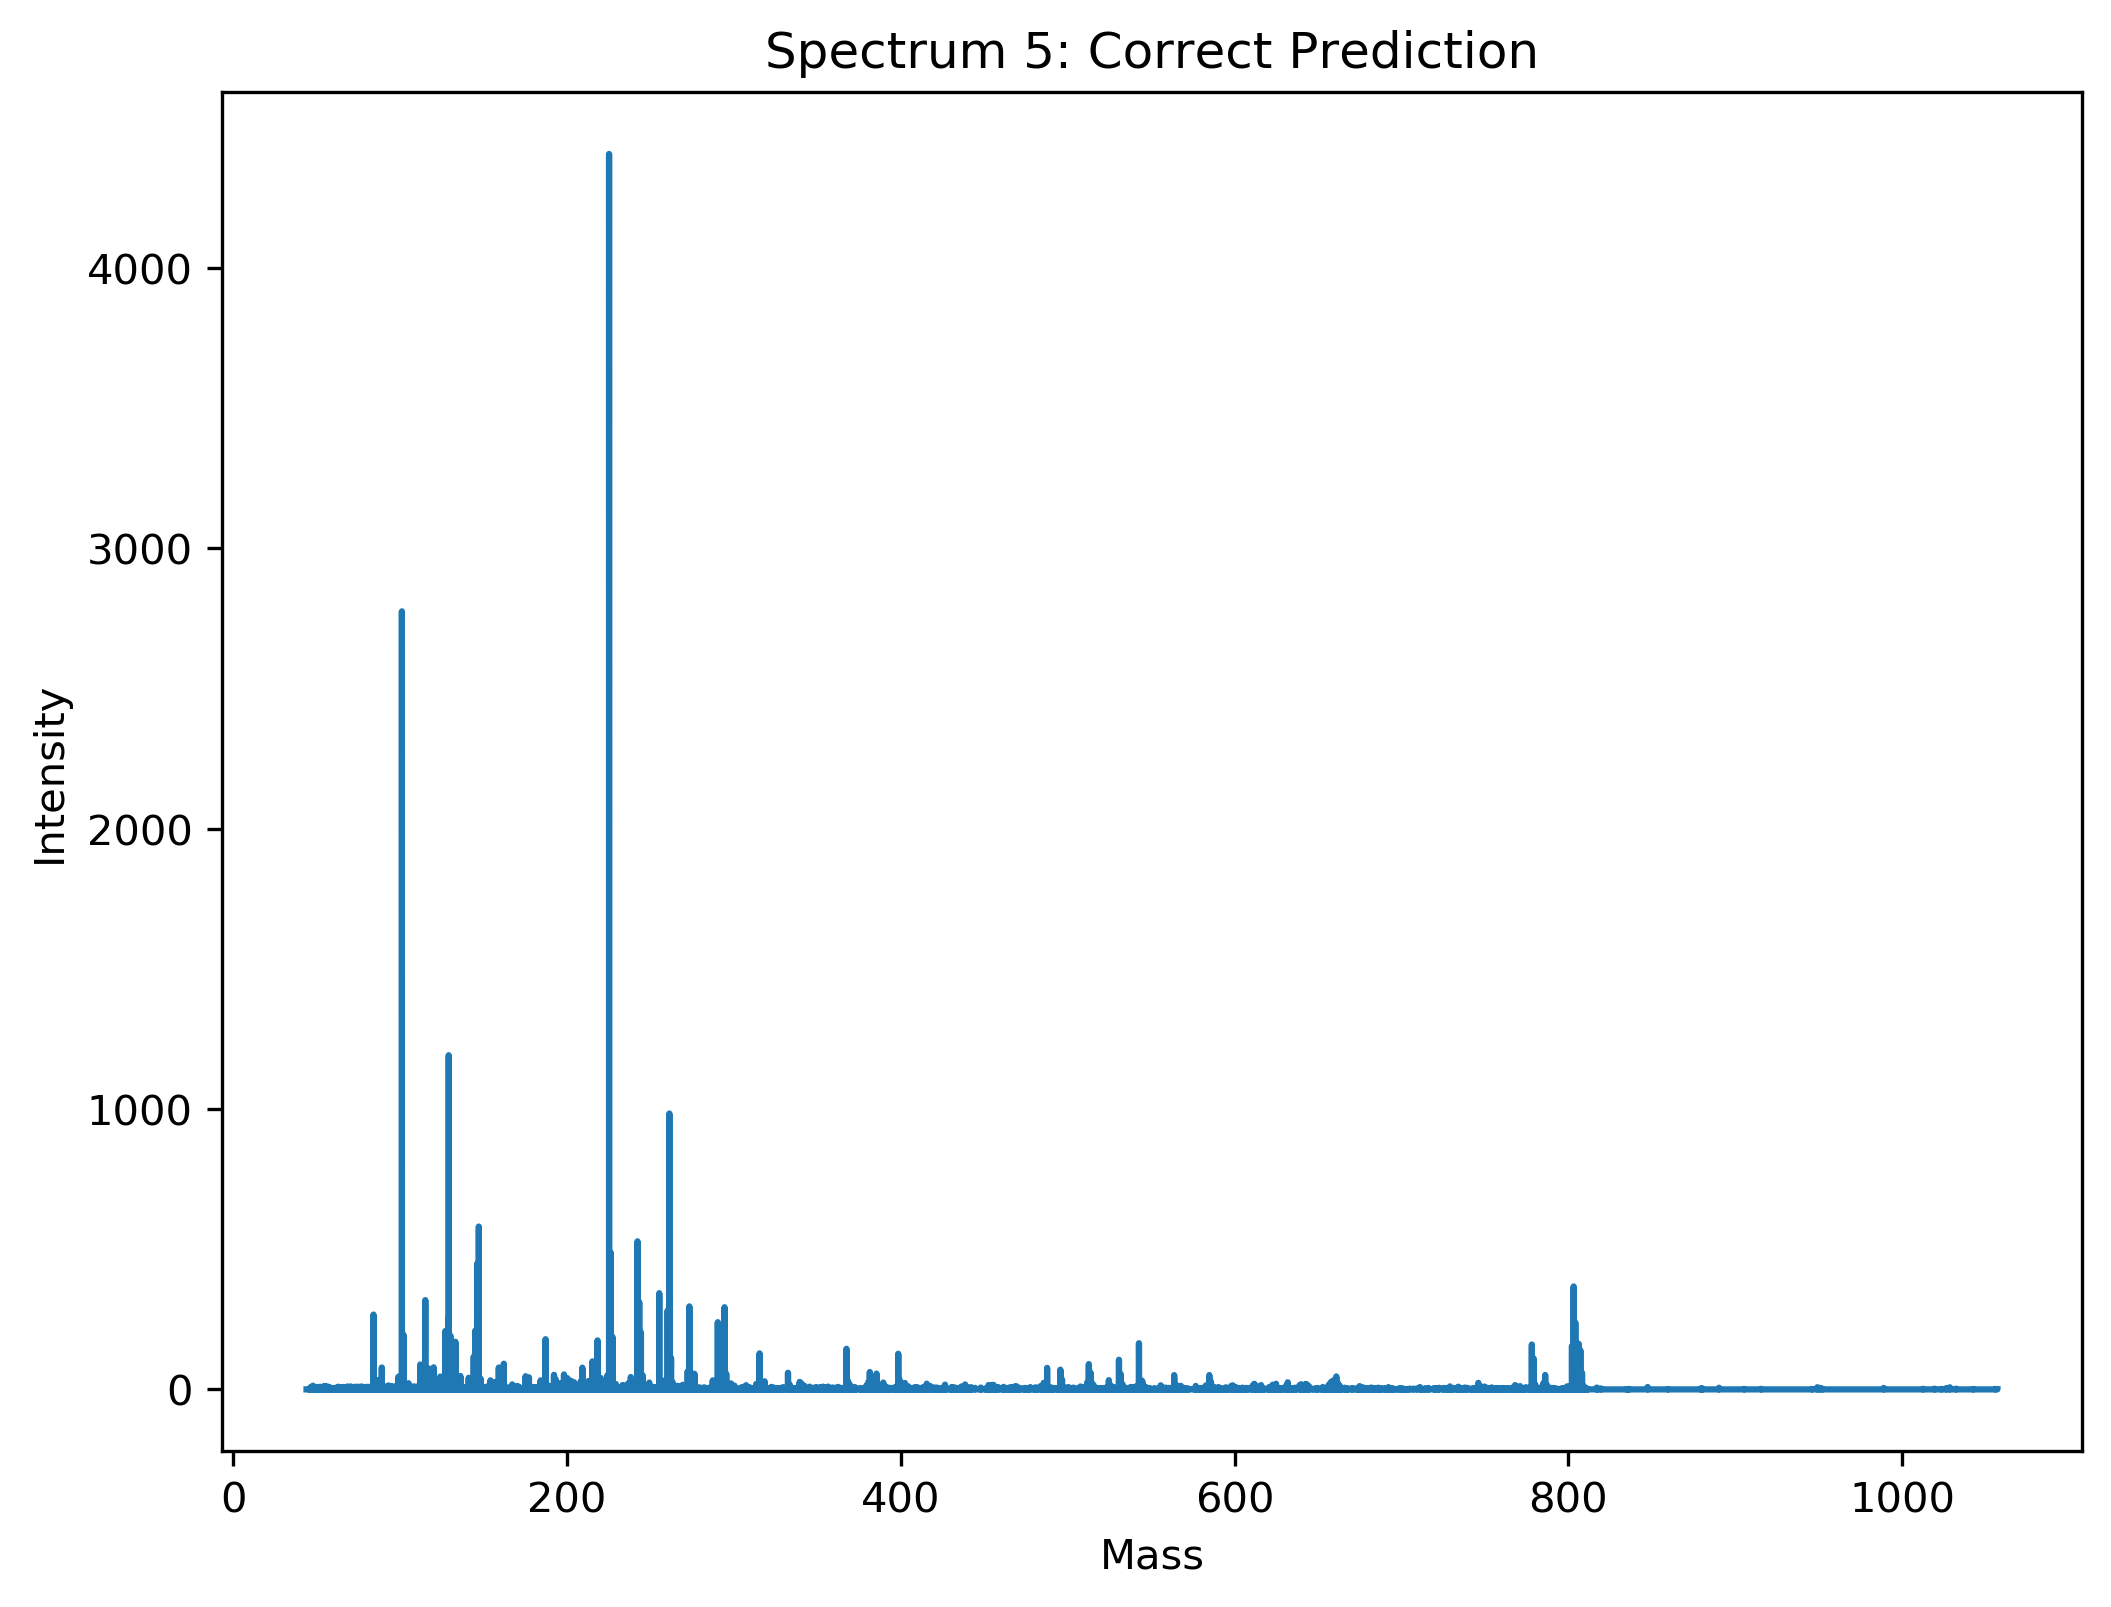

In [149]:
# Insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file 
loaded_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)

# Create the mass scale
mass_scale = np.arange(44, 1057.01, 0.01)

#stack mass scale with spectrum dastaset 
with_mass_data = np.vstack((loaded_data, mass_scale))

# Create Dataframe
with_mass_df = pd.DataFrame(with_mass_data)

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[4,:])
plt.title('Spectrum 4: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[5,:])
plt.title('Spectrum 5: Correct Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

The spectrum does seem to have a lot of noise which could be contributing to the incorrect prediction. Compare this with the much cleaner and more defined spectrum seen in spectrum 5. 

### KNN Incorrect Prediction Evalution

In [144]:
# Fit pipeline to to the training data
KNN_pipe.fit(X_train, y_train)

# Predict using pipeline 
KNN_y_pred = KNN_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(KNN_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = pred_df.style.set_caption("KNN Incorrect Prediction Evalution")
pred_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We observe a similar case with KNN in that spectrum 4 once again is an incorrect prediction, strengthing the case that spectrum 4 is simply a bad spectrum in general.

### LR Incorrect Prediction Evalution

In [151]:
# Fit pipeline to to the training data
LR_pipe.fit(X_train, y_train)

# Predict using pipeline 
LR_y_pred = LR_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(LR_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = pred_df.style.set_caption("LR Incorrect Prediction Evalution")
pred_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


LR performs better and it has predicted spectrum 4 correctly predicted thus provides no value in terms of spectrum quality evaluation. 

### NB Incorrect Prediction Evalution

In [154]:
# Fit pipeline to to the training data
NB_pipe.fit(X_train, y_train)

# Predict using pipeline 
NB_y_pred = NB_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(NB_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = pred_df.style.set_caption("NB Incorrect Prediction Evalution")
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


NB has predicted spectrum 2, 20, 25, 30, 38, 41 and 43 incorrectly predicted which warrants further inspection of the spectrum. 

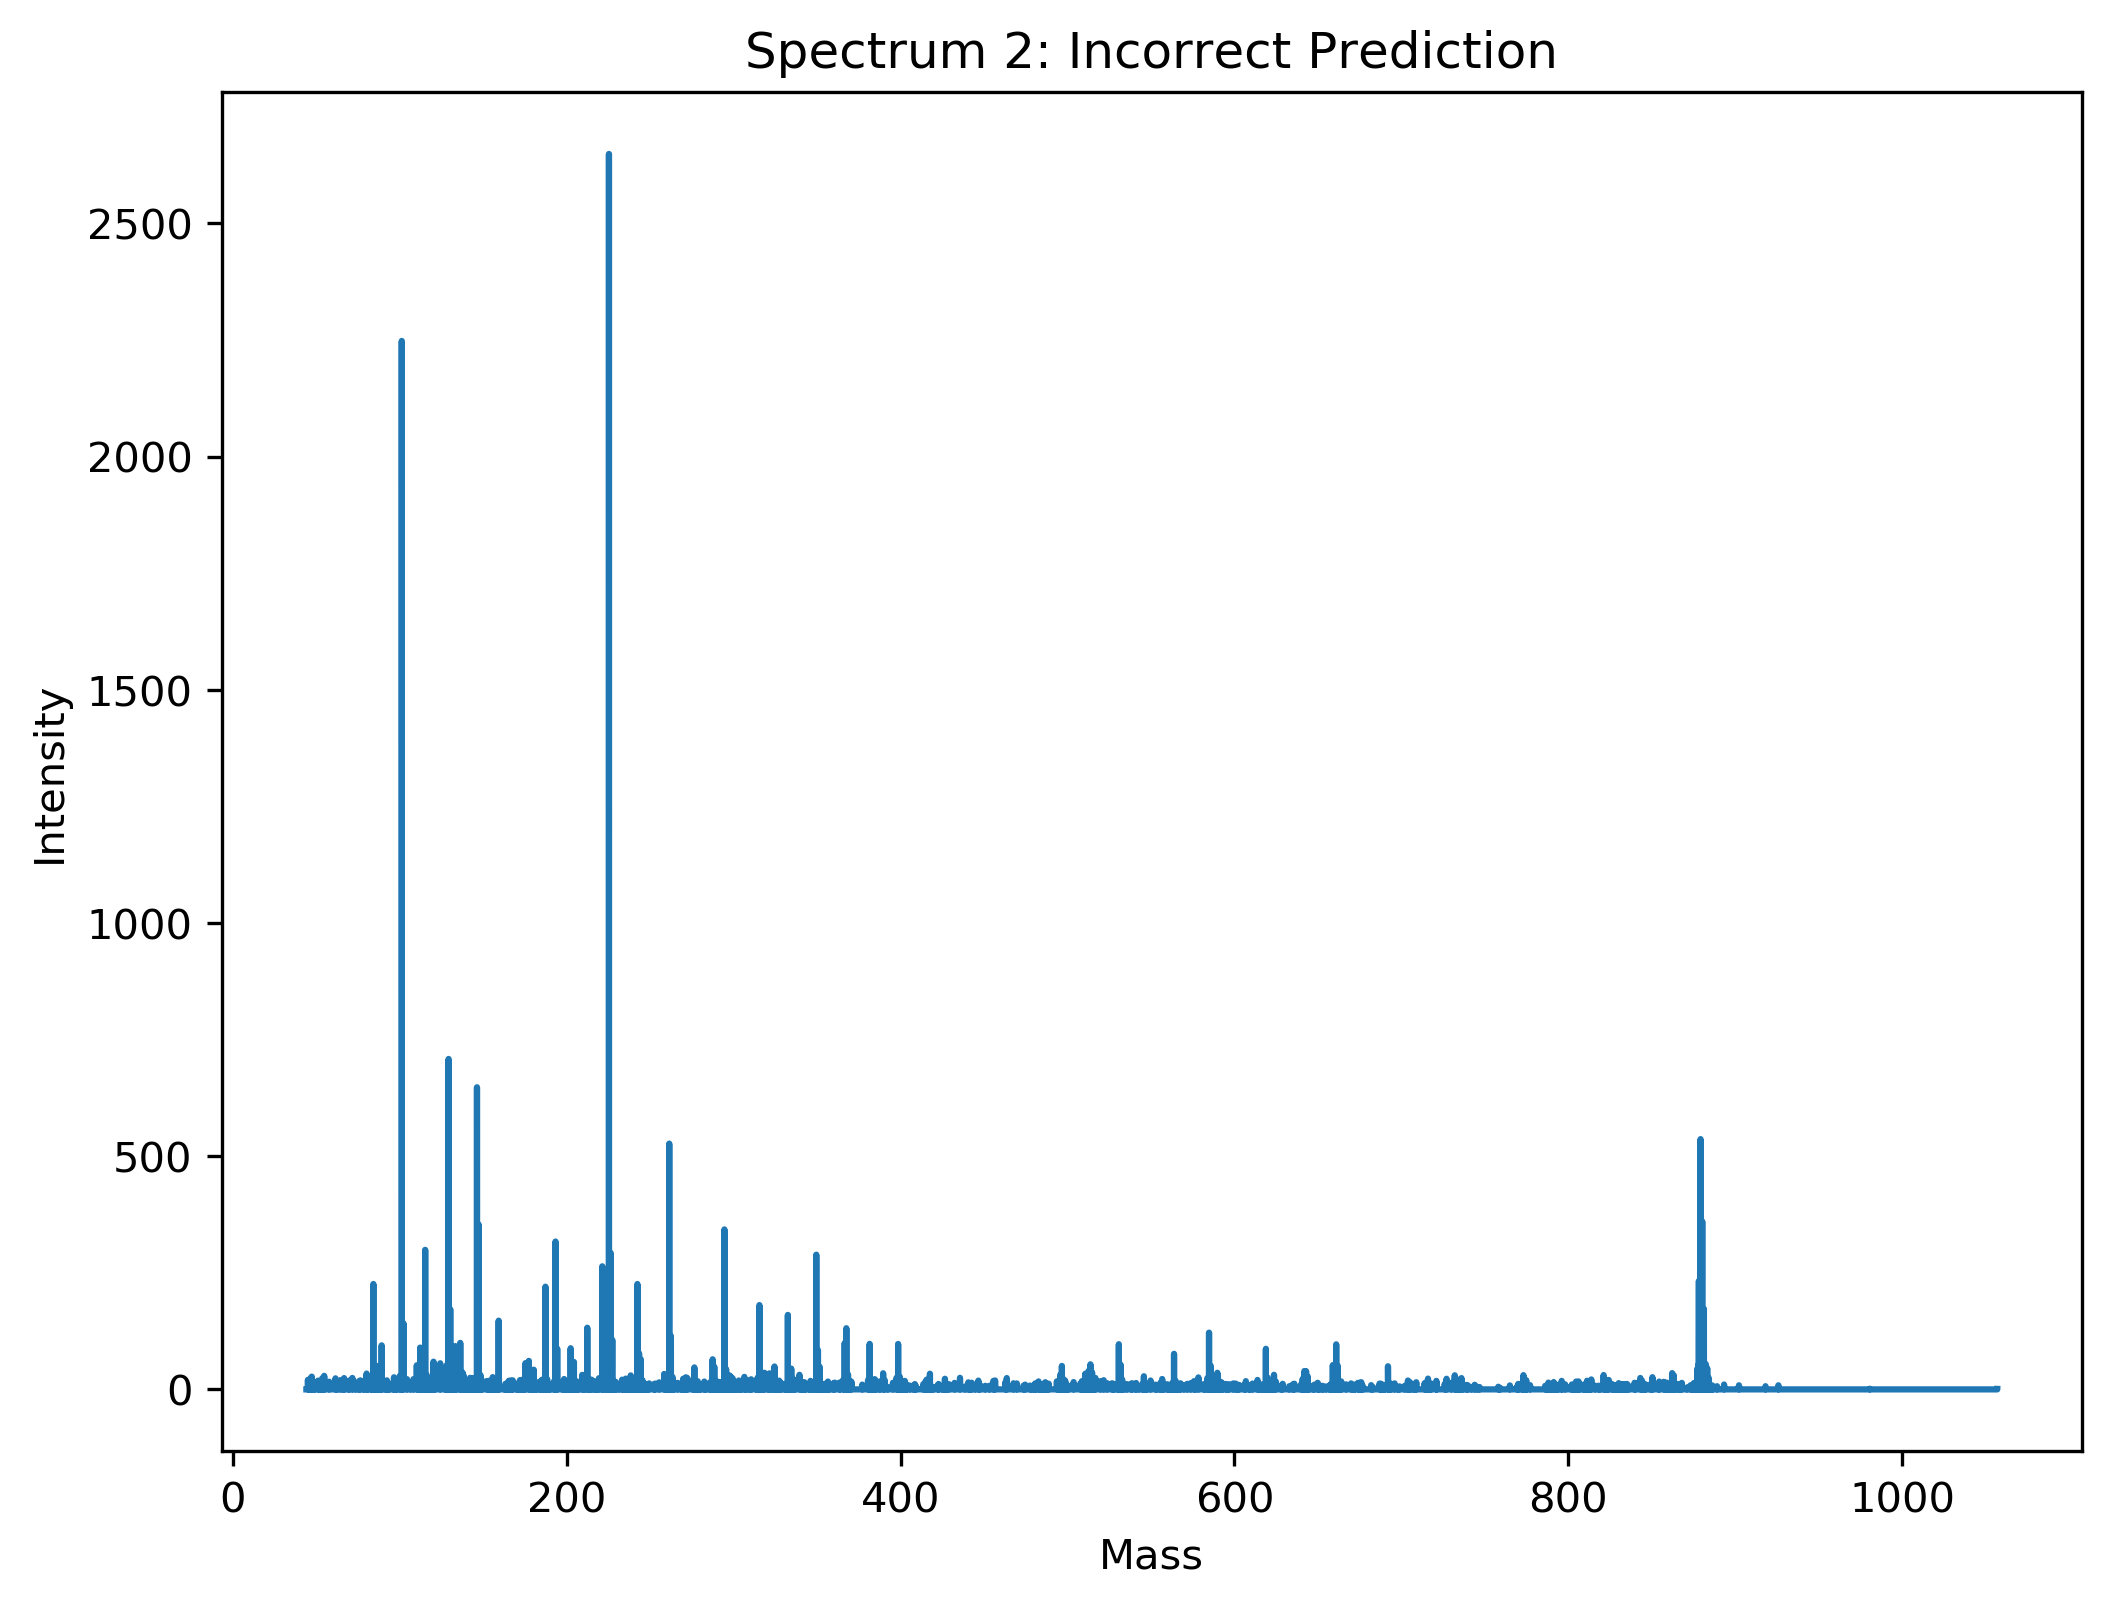

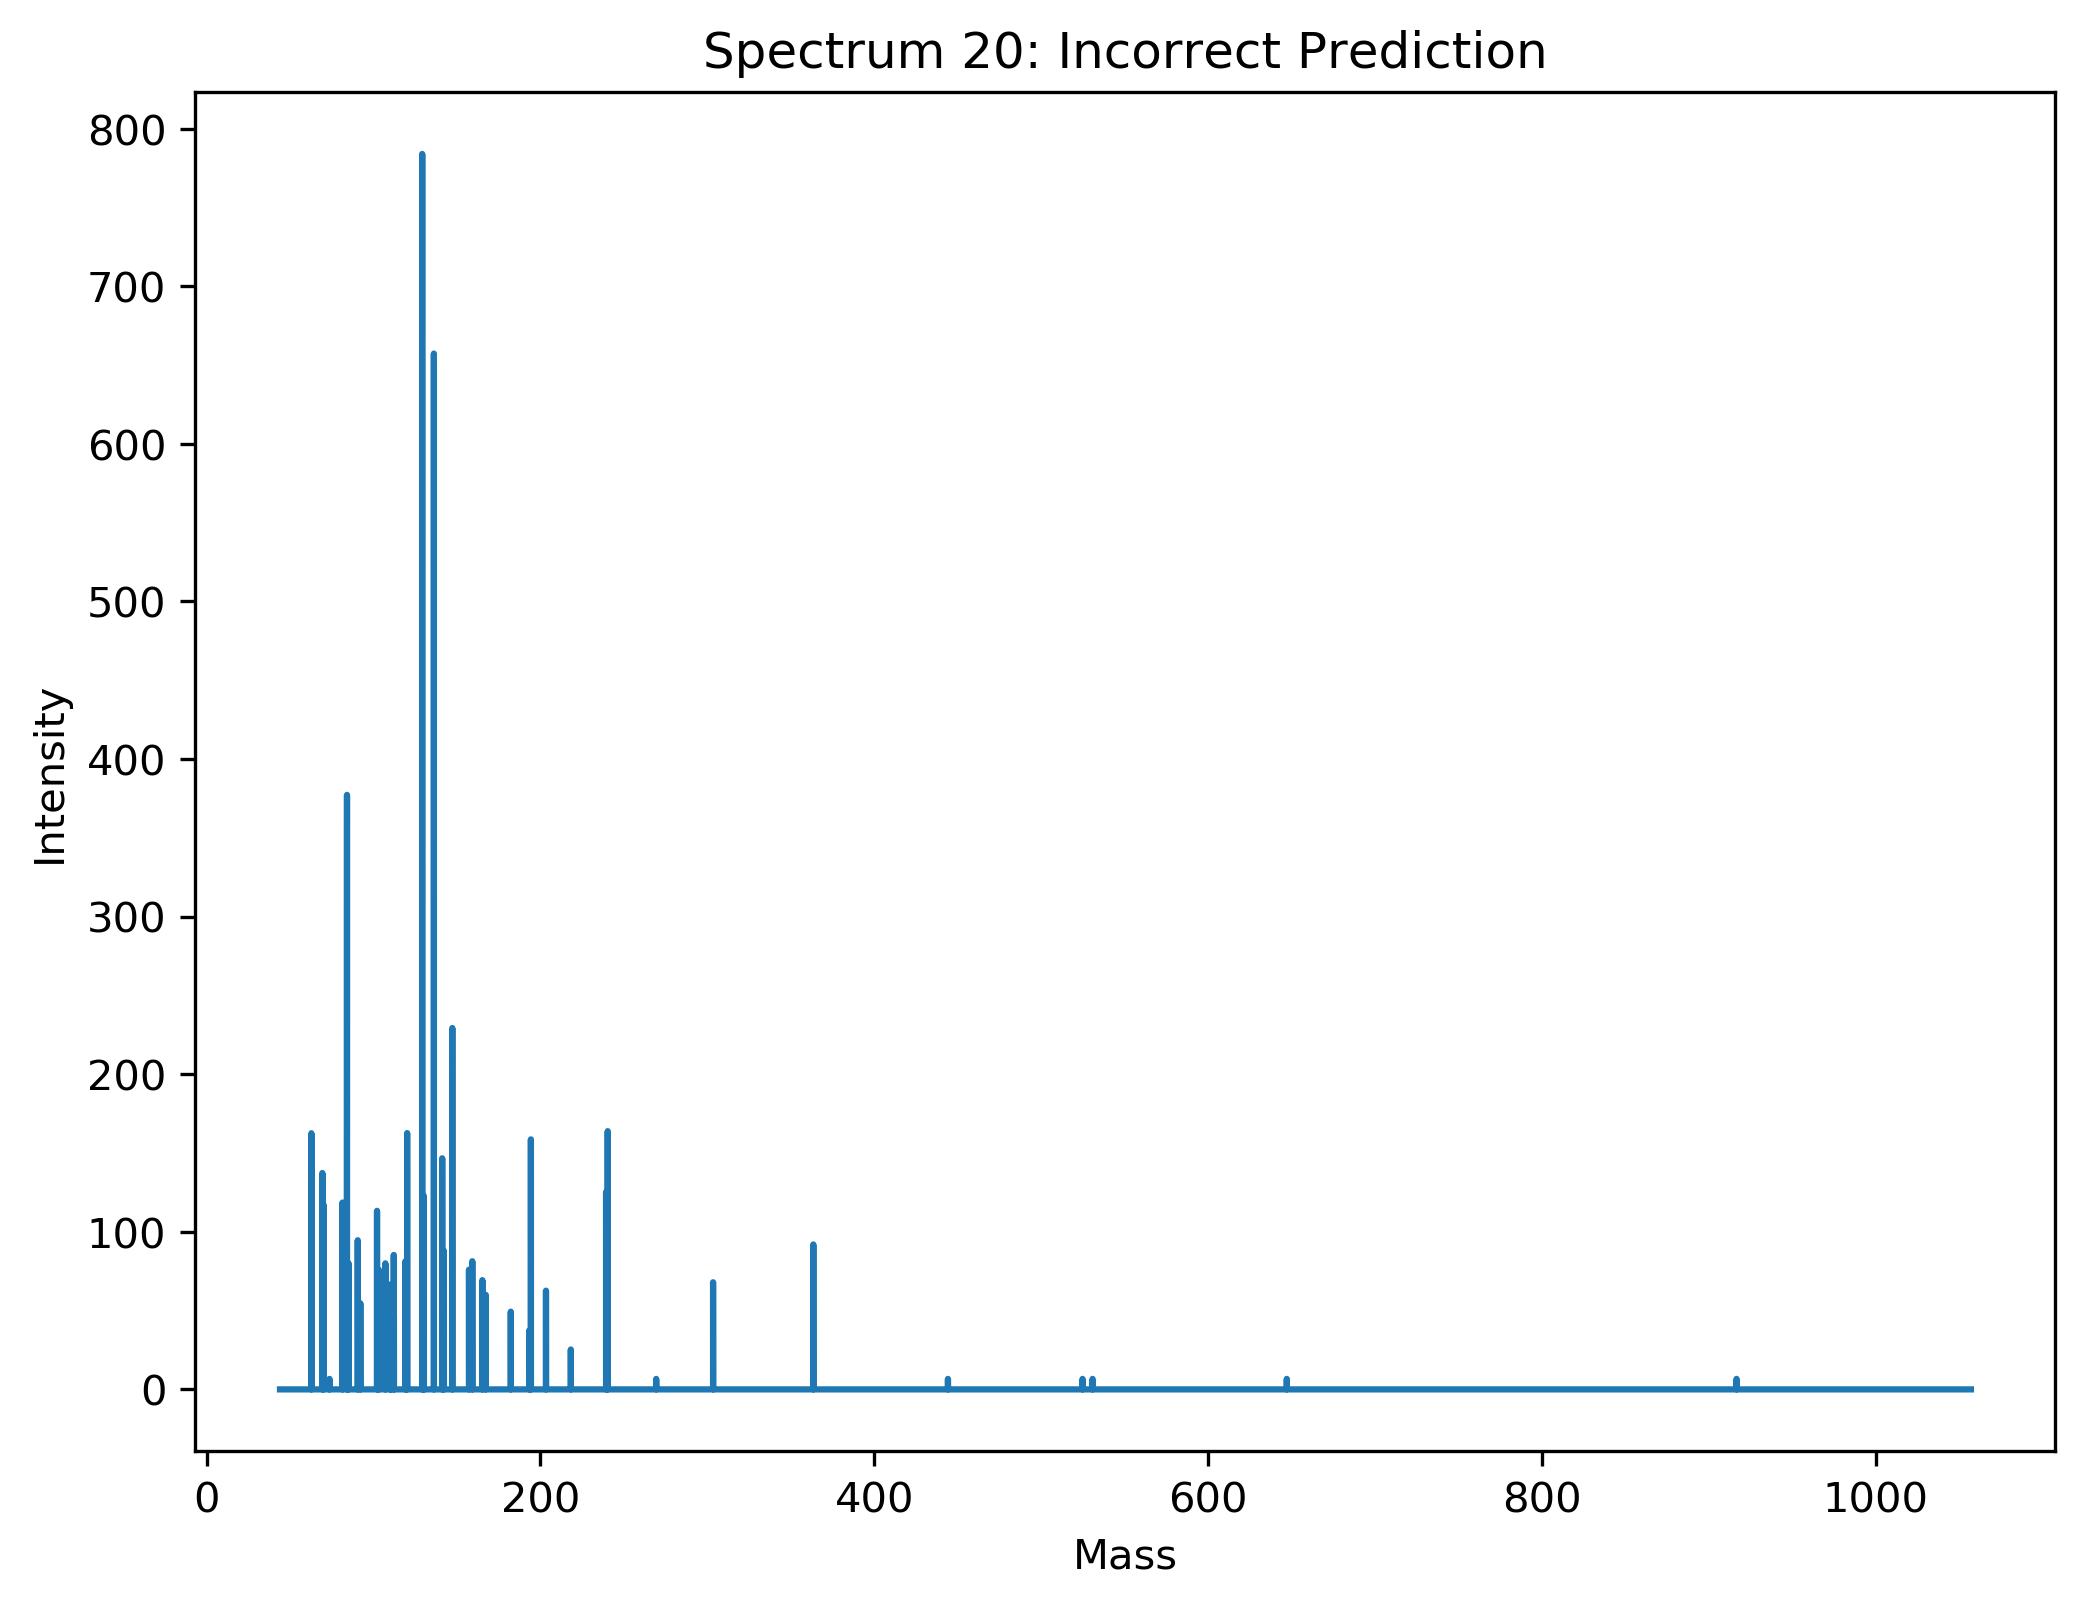

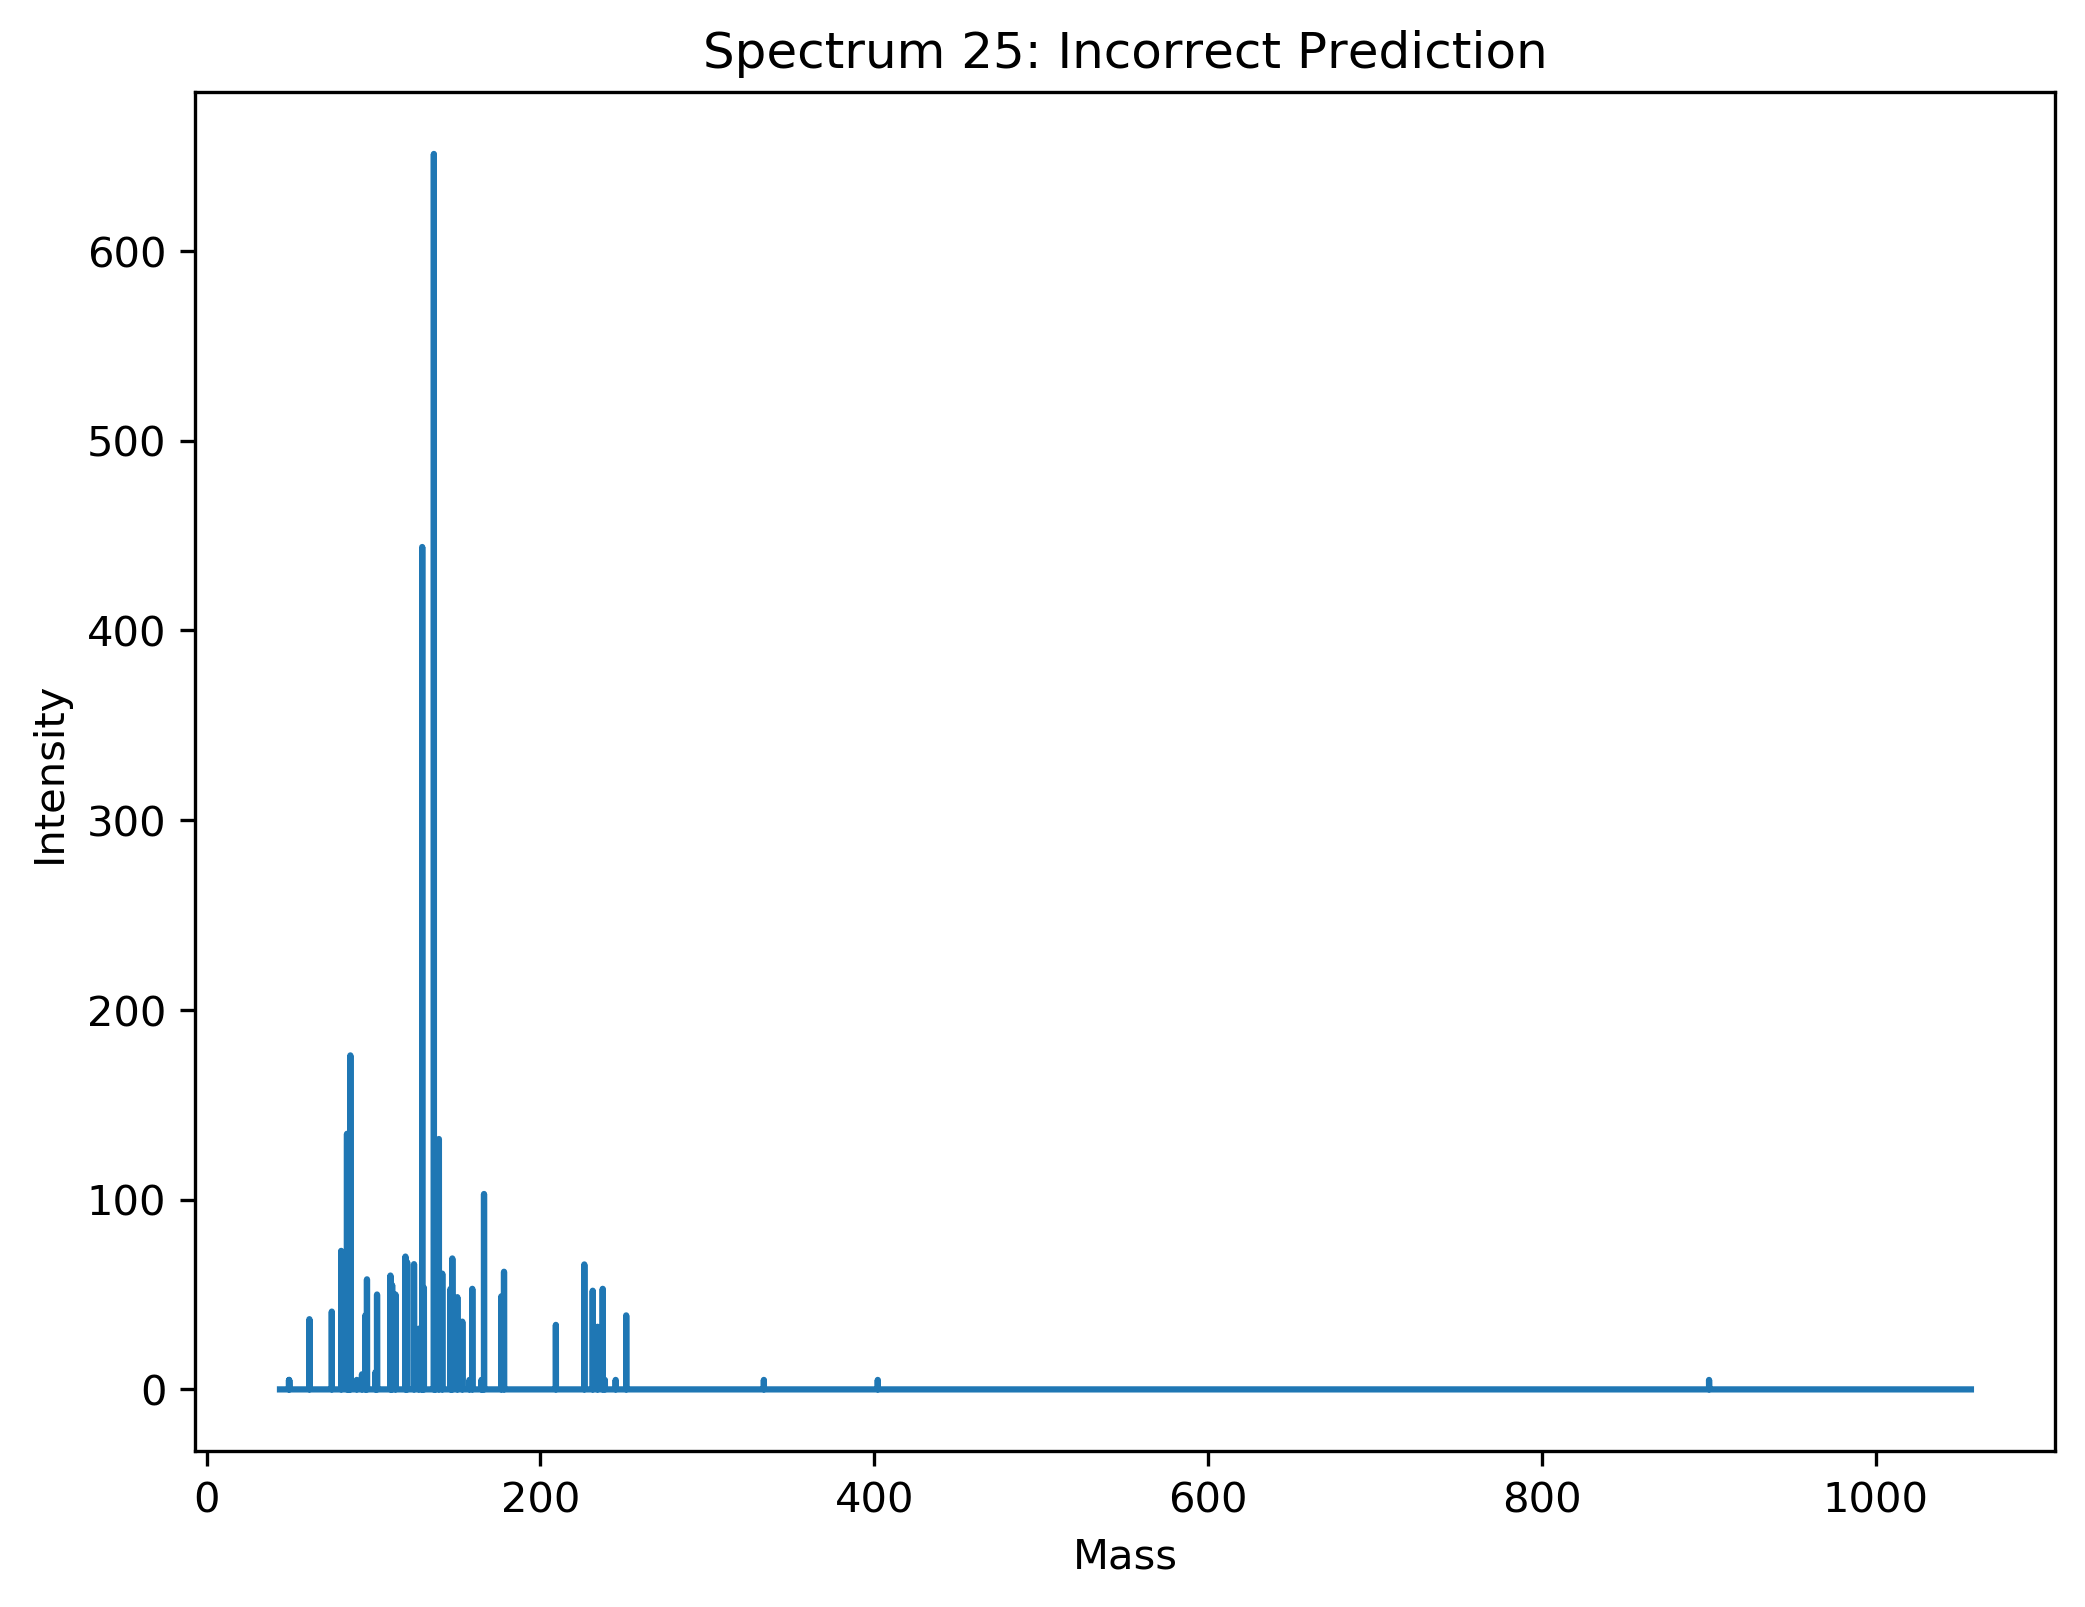

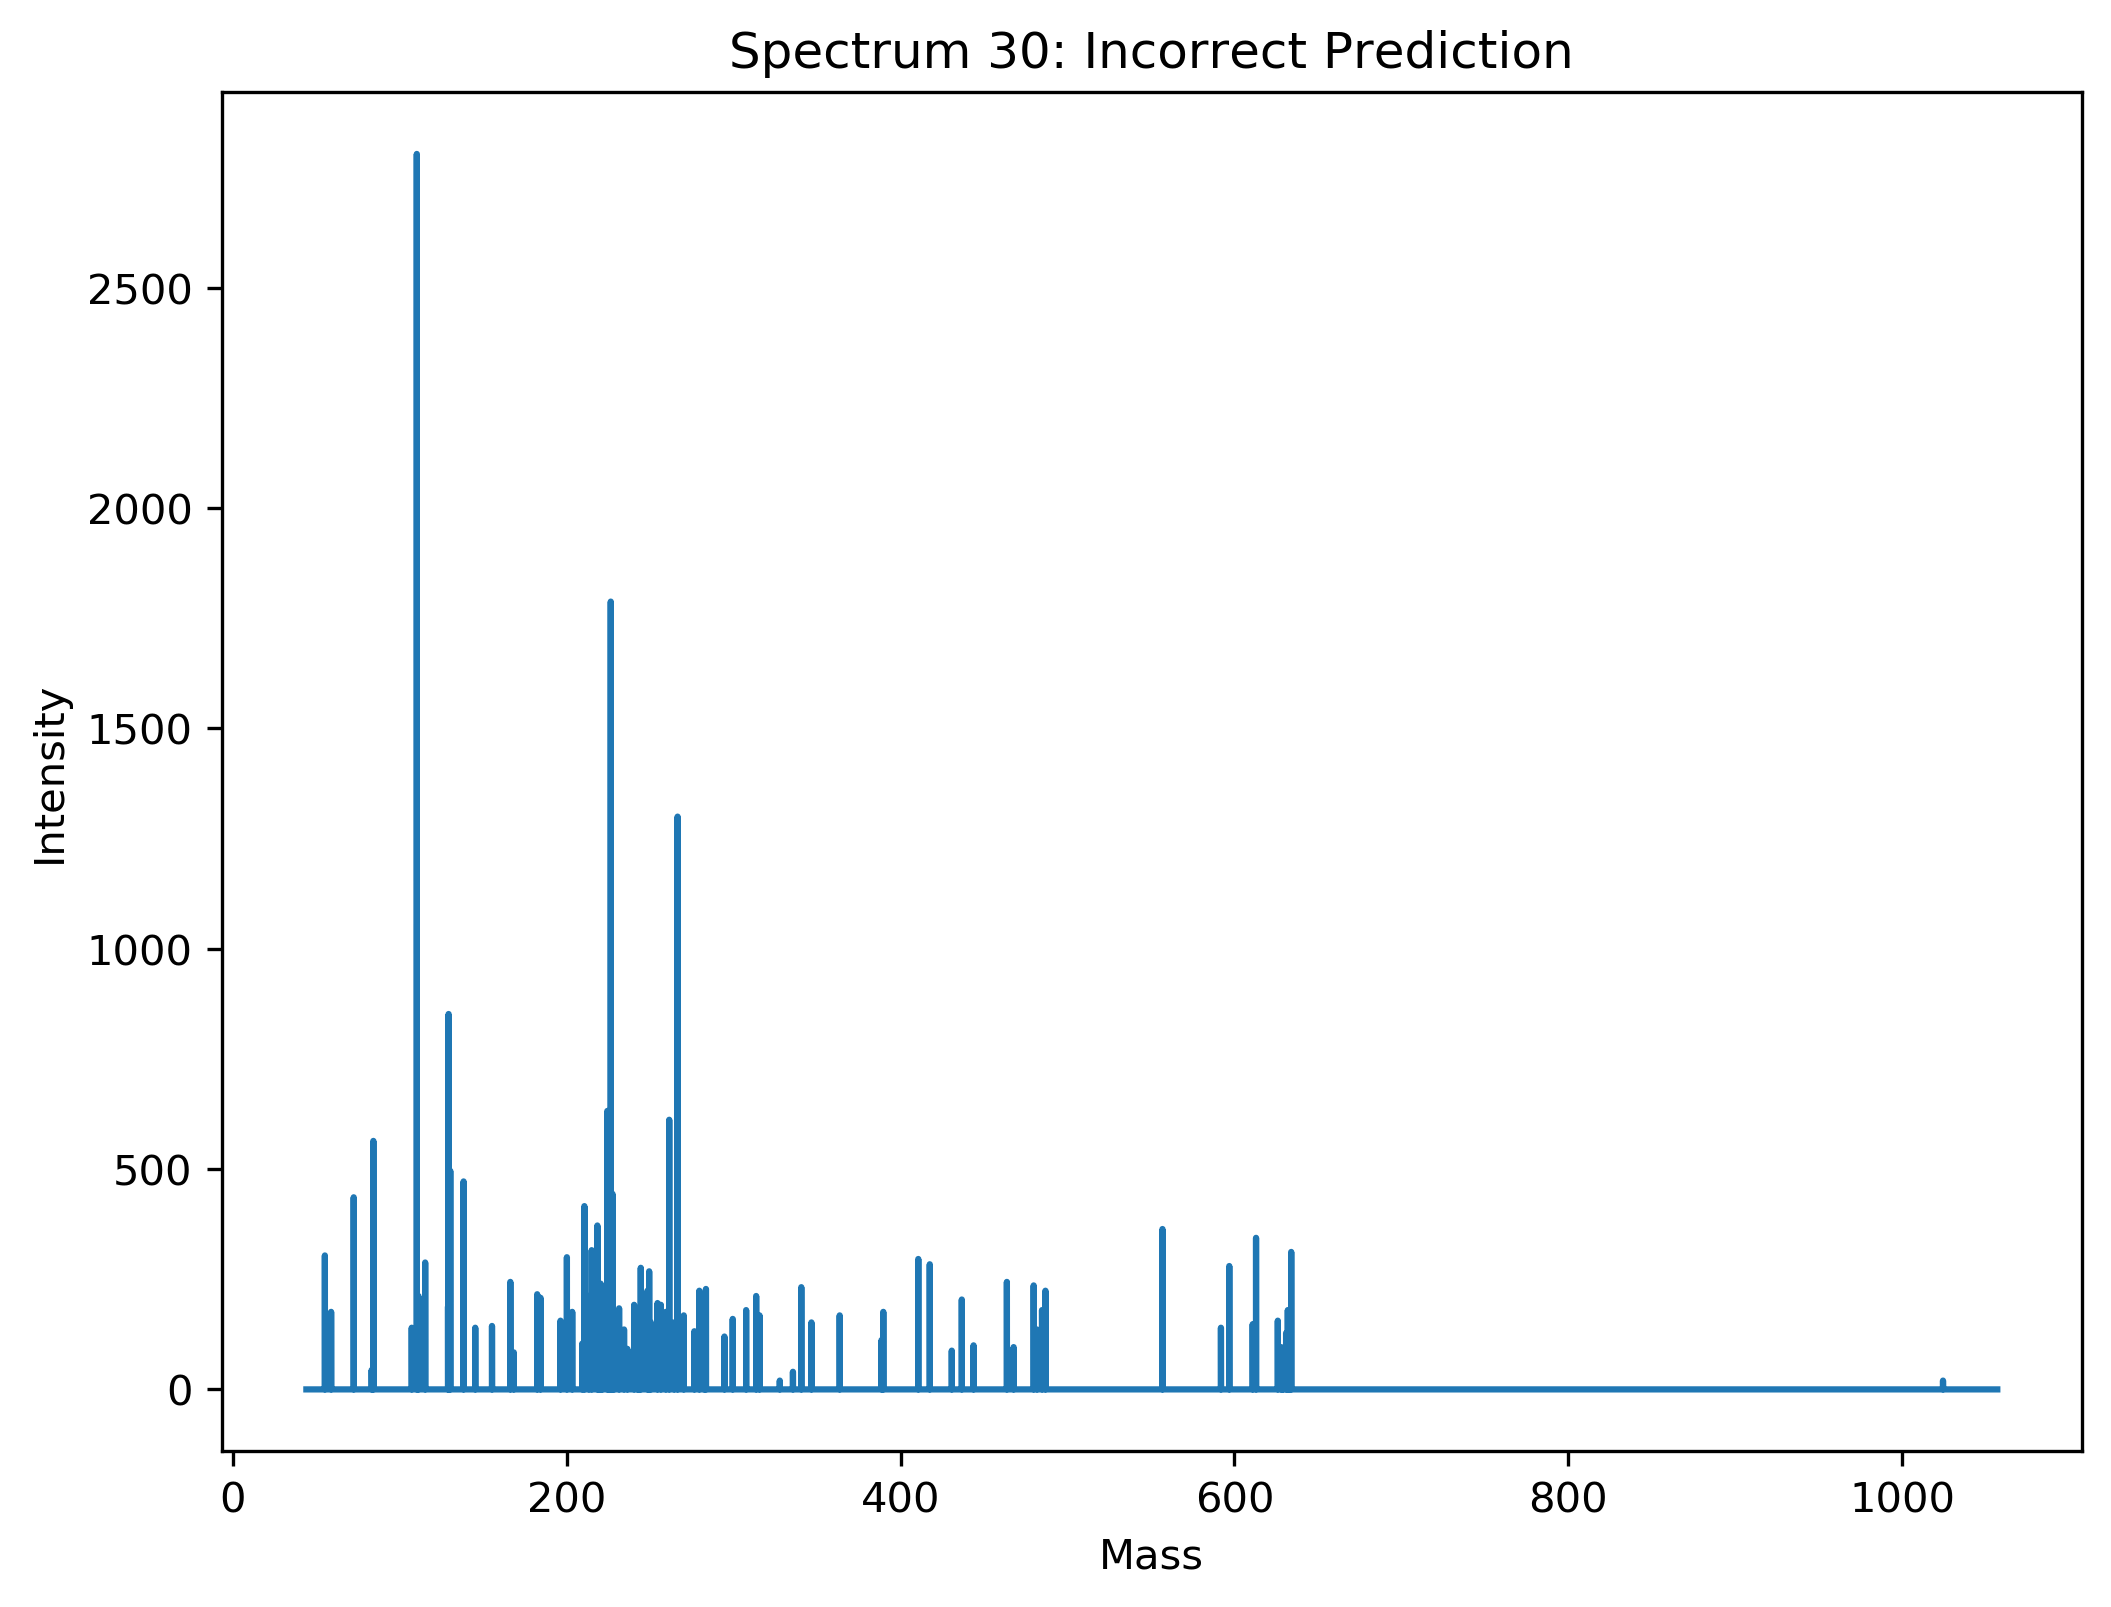

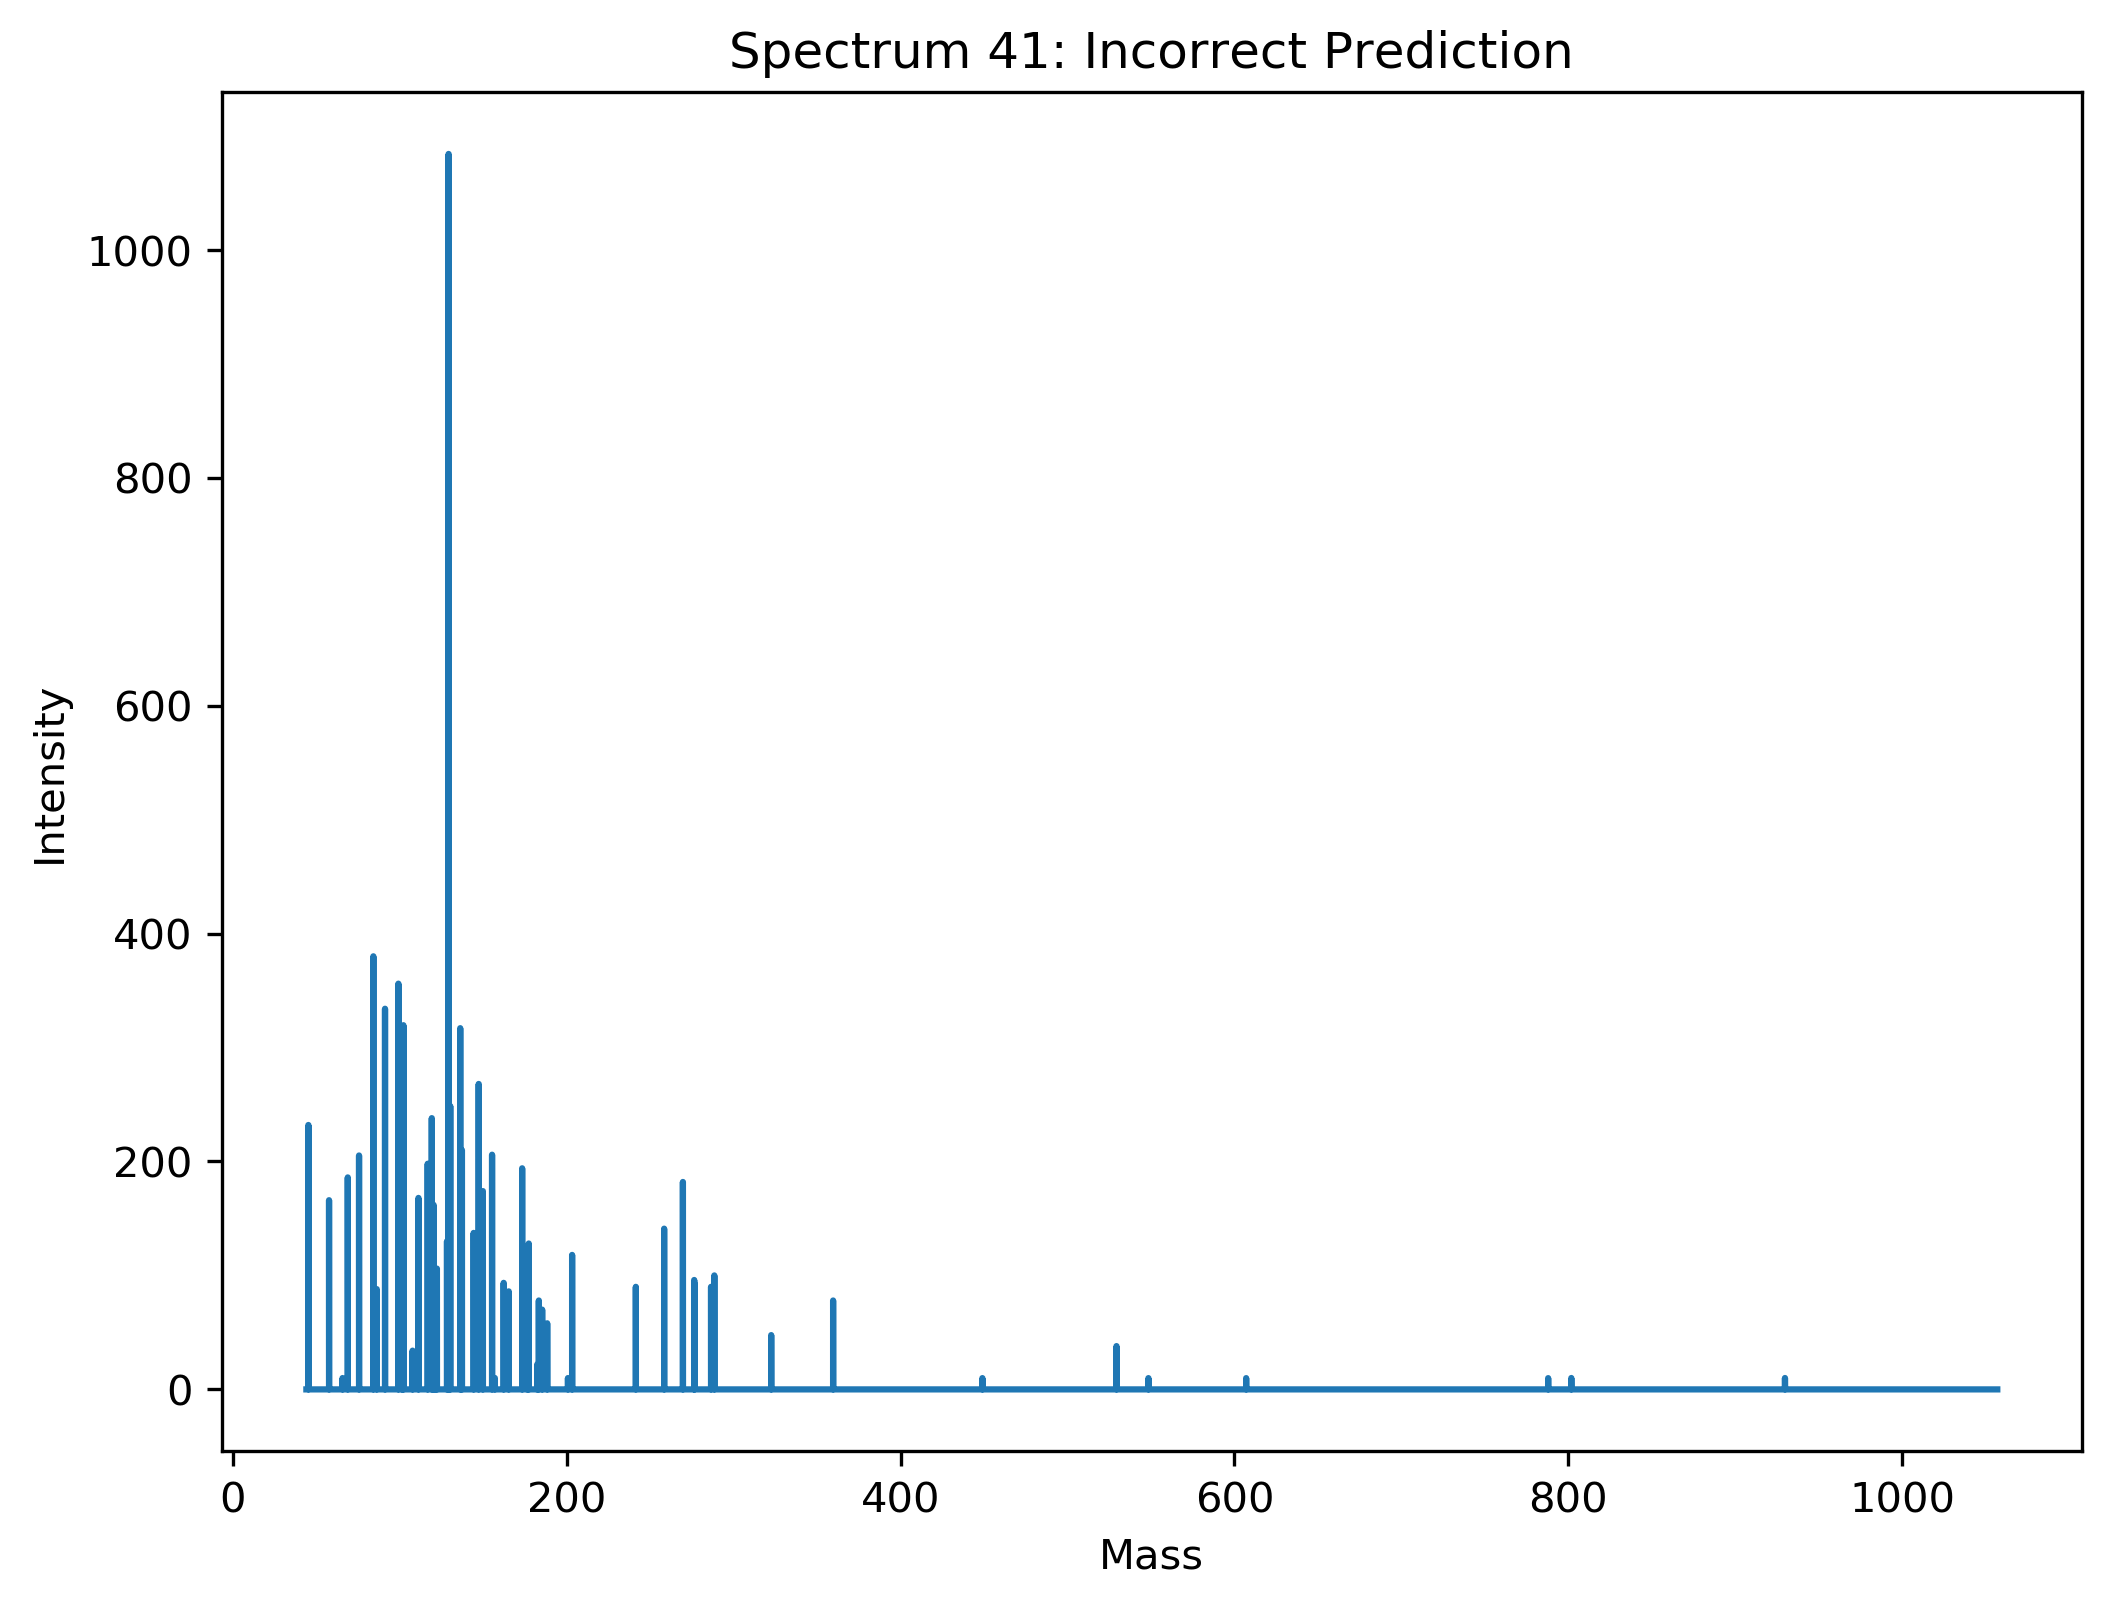

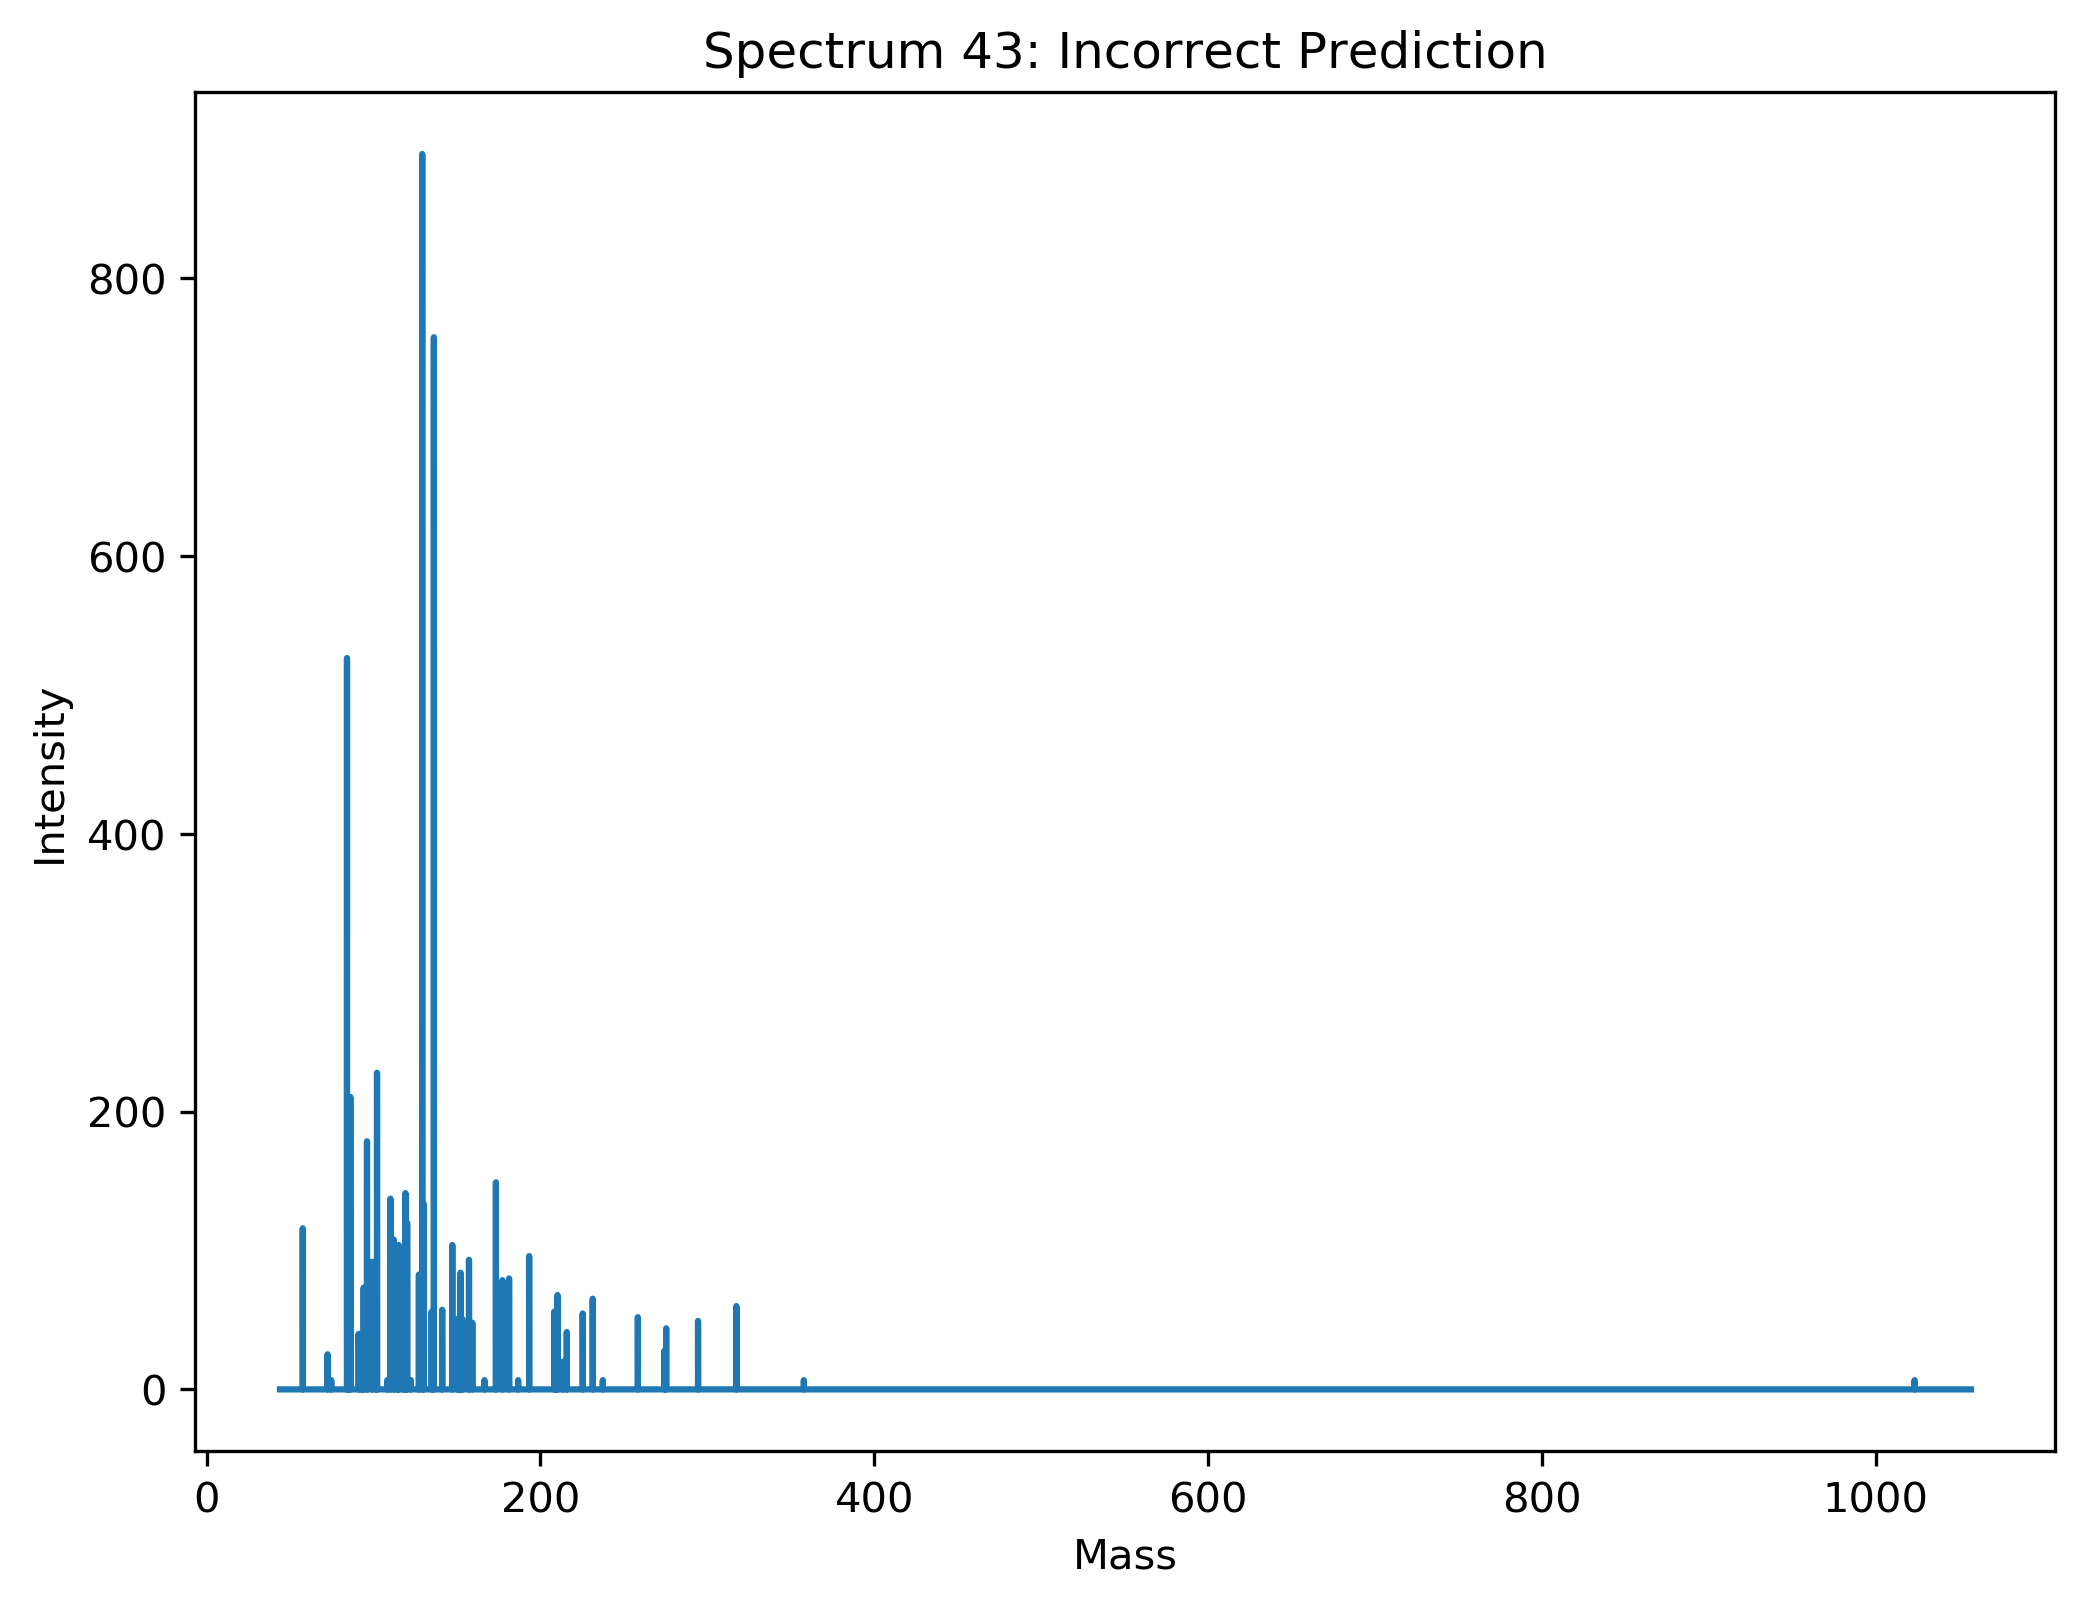

In [158]:
# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[2,:])
plt.title('Spectrum 2: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[20,:])
plt.title('Spectrum 20: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[25,:])
plt.title('Spectrum 25: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[30,:])
plt.title('Spectrum 30: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[41,:])
plt.title('Spectrum 41: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

# Plot data to validate spectrum appearance 
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(with_mass_data[46,:],with_mass_data[43,:])
plt.title('Spectrum 43: Incorrect Prediction')
plt.xlabel('Mass')
plt.ylabel('Intensity')
plt.show()

Unlike spectrum 4, the visual quality of spectrum 2 does not seem to have a substantial amount of noise relative to its intensity scale. Spectrum 20, 25, 41 and 43 have much lower intensitie and therefore can be more sensitive to noise and thus obscure prediction. It is clear by the volume of incorrect predictions, however, that it likely that the root of the incorrect prediction is that the model underperforms, in combination with some low quality spectrum. 

### RF Incorrect Prediction Evalution

In [159]:
# Fit pipeline to to the training data
RF_pipe.fit(X_train, y_train)

# Predict using pipeline 
RF_y_pred = RF_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(RF_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = pred_df.style.set_caption("RF Incorrect Prediction Evalution")
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Similar to LR, RF performs well and it has correctly predicted all spectrum and thus provides no value in terms of spectrum quality evaluation. 

### SVM Incorrect Prediction Evalution

In [160]:
# Fit pipeline to to the training data
SVM_pipe.fit(X_train, y_train)

# Predict using pipeline 
SVM_y_pred = SVM_pipe.predict(X)

# Build dataframe and house both scores
pred_df = pd.DataFrame(data=(SVM_y_pred, y), index=['Prediction', 'Official'], dtype=int)
pred_df = pred_df.style.set_caption("SVM Incorrect Prediction Evalution")
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Prediction,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Official,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Similar to RF and LR, SVM performs well and it has correctly predicted all spectrum. Thus, provides no value in terms of spectrum quality evaluation. 

## Model Selection

The only classifier to score the highest in all tests, and the only one to score 100% in model assessment using repeated stratified k-fold cross validation is SVM. Thus, Support Vector Machines is the optimum classifier for identifying and predicting modified peptides. 

=== Support Vector Machines Validation Dataset Scores ===
Average Test Accuracy: 1.000 (0.000)
Average Fit Time: 0.679 (0.188)
Average Score Time: 0.679 (0.188)
Average Fit Test ROC & AUC: 0.679 (0.188)


=== Support Vector Machines Hold Out Dataset Scores ===
Average Hold Out Accuracy: 1.000 (0.000)
Average Hold Out Fit Time: 0.599 (0.096)
Average Hold Out Score Time: 0.513 (0.048)
Average Hold Out Test ROC & AUC: 1.000 (0.000)

=== Optimum Hyperparameters ===
{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

